<a href="https://colab.research.google.com/github/rayxuan2000/Air-Quality-Prediction-and-Map-Visualization/blob/main/Healthy_Home_Prediction_%26_Map_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Healthy Home Prediction & Map Visalization


1. Geo-related coding
2. Geo-related Visualization
3. Regression models
4. For Health-related companies


# 1.Set Environment & Libraries

In [ ]:

# Set an environment for geopandas & other geo-related libraries

# Aclima/Purple Air

%%time

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes

# Geo-related libraries
!pip install geopandas
!pip install osmnx
!pip install contextily
!pip install folium
!pip install plotly_express
!pip install geofeather

# # Others
# !pip install matplotlib==3.1.3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-rtree is already the newest version (0.9.7-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-hjaqocah
  Running command git clone --filter=blob:none --quiet git://github.com/geopandas/geopandas.git /tmp/pip-req-build-hjaqocah
  fatal: unable to connect to github.com:
  github.com[0: 140.82.114.3]: errno=Connection timed out

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet git://g

In [ ]:
# Data manipulation libraries
import os
import pandas as pd
import numpy as np

# Geo-related libraries
import geopandas as gpd
import osmnx as ox
import folium
from folium.plugins import HeatMap
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import contextily as ctx
import geofeather
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely import wkt
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
from shapely import wkt

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Timer
from tqdm import tqdm, tqdm_notebook


# Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor


# Model support functions
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
from pprint import pprint
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2.Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ****
%cd /content/drive/MyDrive/resume_project/Healthy_home

/content/drive/MyDrive/resume_project/Healthy_home


In [ ]:
# Read air pollutant & health info
df_1 = pd.read_csv("Home_n_Map.csv")
df_1.head(5)

NO value  NO2 value  PM2p5 value                                geometry  \
0  23.390071  17.539762    17.612700        POINT (-122.3225938 37.80678062)   
1  19.700000  19.956750    15.946719          POINT (-122.32231 37.80614989)   
2  23.611111  23.967768    16.210698        POINT (-122.3223008 37.80642014)   
3  15.714285  18.435184    15.561862  POINT (-122.3222988 37.80587979999999)   
4  27.108695  25.797037    17.120884        POINT (-122.3222671 37.80668898)   

   road_type        zone                                     tract_name  \
0   tertiary  industrial  Census Tract 9819, Alameda County, California   
1  secondary  industrial  Census Tract 9819, Alameda County, California   
2  secondary  industrial  Census Tract 9819, Alameda County, California   
3  secondary  industrial  Census Tract 9819, Alameda County, California   
4  secondary  industrial  Census Tract 9819, Alameda County, California   

        GEOID  state  county   pop_den      wind       temp   Longitude  \
0  6001981900      6       1  8.336845  4.133333  14.950001 -122.322594   
1  6001981900      6       1  8.336845  4.133333  14.950001 -122.322310   
2  6001981900      6       1  8.336845  4.133333  14.950001 -122.322301   
3  6001981900      6       1  8.336845  4.133333  14.950001 -122.322299   
4  6001981900      6       1  8.336845  4.133333  14.950001 -122.322267   

    Latitude Respiratory_HI   Pt_CANCR  
0  37.806781           high  0.7 - 0.8  
1  37.806150           high  0.7 - 0.8  
2  37.806420           high  0.7 - 0.8  
3  37.805880           high  0.7 - 0.8  
4  37.806689           high  0.7 - 0.8

In [ ]:
# Check a null counts(??) and data types
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18286 entries, 0 to 18285
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NO value        18286 non-null  float64
 1   NO2 value       18286 non-null  float64
 2   PM2p5 value     18286 non-null  float64
 3   geometry        18286 non-null  object 
 4   road_type       18286 non-null  object 
 5   zone            18238 non-null  object 
 6   tract_name      18286 non-null  object 
 7   GEOID           18286 non-null  int64  
 8   state           18286 non-null  int64  
 9   county          18286 non-null  int64  
 10  pop_den         18286 non-null  float64
 11  wind            18270 non-null  float64
 12  temp            18270 non-null  float64
 13  Longitude       18286 non-null  float64
 14  Latitude        18286 non-null  float64
 15  Respiratory_HI  18286 non-null  object 
 16  Pt_CANCR        18286 non-null  object 
dtypes: float64(8), int64(3), object

In [ ]:
# Mapping the data points
# (a) convert pandas df --> geopandas df (based on latitude & longitude) --> epsg:4326 == degree

# crs: Coordinate reference system
# Here, 'epsg:4326' refers to the EPSG code for the WGS 84 coordinate reference system,
# which is commonly used for GPS data (latitude and longitude coordinates).

# EPSG 4326 uses a coordinate system the same as a GLOBE (curved surface).
gpd_1_degree = gpd.GeoDataFrame(df_1, geometry=gpd.points_from_xy(df_1.Longitude, df_1.Latitude), \
                                crs='epsg:4326')
gpd_1_degree.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18286 entries, 0 to 18285
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NO value        18286 non-null  float64 
 1   NO2 value       18286 non-null  float64 
 2   PM2p5 value     18286 non-null  float64 
 3   geometry        18286 non-null  geometry
 4   road_type       18286 non-null  object  
 5   zone            18238 non-null  object  
 6   tract_name      18286 non-null  object  
 7   GEOID           18286 non-null  int64   
 8   state           18286 non-null  int64   
 9   county          18286 non-null  int64   
 10  pop_den         18286 non-null  float64 
 11  wind            18270 non-null  float64 
 12  temp            18270 non-null  float64 
 13  Longitude       18286 non-null  float64 
 14  Latitude        18286 non-null  float64 
 15  Respiratory_HI  18286 non-null  object  
 16  Pt_CANCR        18286 non-null  object  
dtypes: f

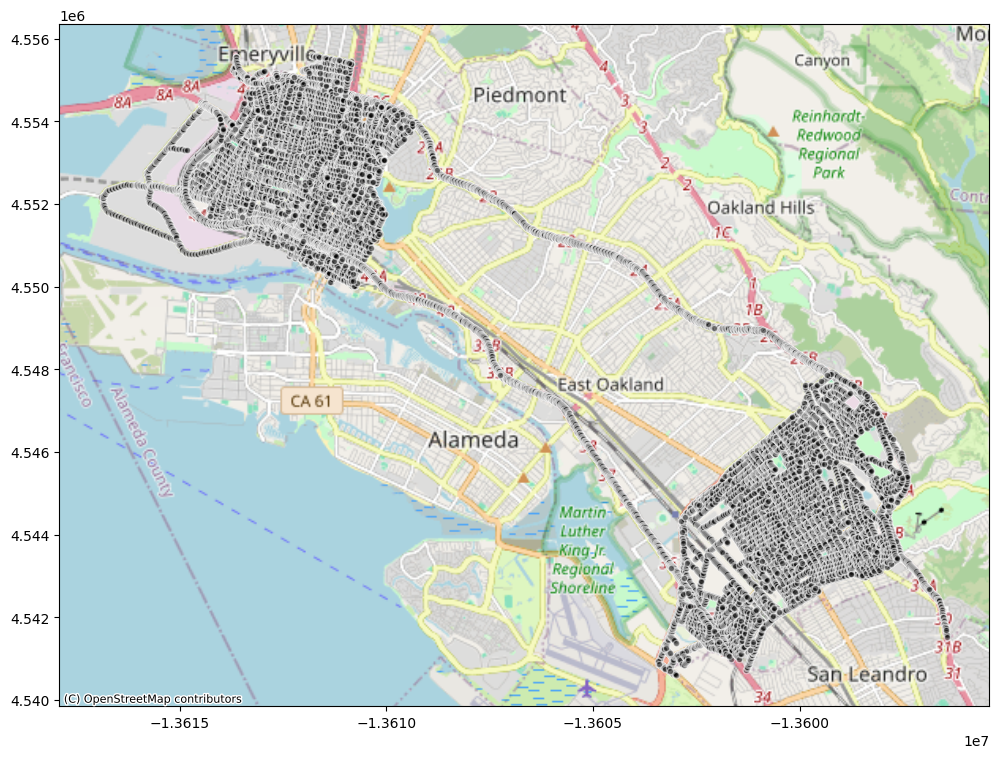

In [ ]:
# Mapping the data points
# (b) draw a figure

# EPSG 3857 uses a coordinate system the same as a MAP (flat surface).
# Horizontal (X): The range is from approximately -20,037,508.34 meters to 20,037,508.34 meters.
# Vertical (Y): The range is also from approximately -20,037,508.34 meters to 20,037,508.34 meters.
fig, ax = plt.subplots(figsize=(12, 10))
gpd_1_degree.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=20,
               color="black",
               edgecolor="white",
               alpha=0.5,
               marker="o"
            );

# adding a basemap background sourced from OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# save the figure if needed
# fig.savefig('output/file_name', dpi = 400, transparent = True)

# 3.Data Cleaning

In [ ]:
# Check dataframe
df_1.head(2)

NO value  NO2 value  PM2p5 value                          geometry  \
0  23.390071  17.539762    17.612700  POINT (-122.3225938 37.80678062)   
1  19.700000  19.956750    15.946719    POINT (-122.32231 37.80614989)   

   road_type        zone                                     tract_name  \
0   tertiary  industrial  Census Tract 9819, Alameda County, California   
1  secondary  industrial  Census Tract 9819, Alameda County, California   

        GEOID  state  county   pop_den      wind       temp   Longitude  \
0  6001981900      6       1  8.336845  4.133333  14.950001 -122.322594   
1  6001981900      6       1  8.336845  4.133333  14.950001 -122.322310   

    Latitude Respiratory_HI   Pt_CANCR  
0  37.806781           high  0.7 - 0.8  
1  37.806150           high  0.7 - 0.8

## Rename

In [ ]:
# Rename (replacing 'NO value' to 'NO')
df_1 = df_1.rename(columns={'NO value': 'NO'})

# Rename (replacing 'NO2 value' to 'NO2')
df_1 = df_1.rename(columns={'NO2 value': 'NO2'})

# Rename (replacing 'PM2p5 value' to 'PM2p5')
df_1 = df_1.rename(columns={'PM2p5 value': 'PM2p5'})

# EDF_points = EDF_points.rename(index=str, columns={"NO Value": "NO", "NO2 Value": "NO2", "PM2p5 Value": "PM2p5"})

## Drop Irrelevant Feature

In [ ]:
# count unique values for each feature - do this step before missing data，
# preveting unnecessary filters
print("*** Cnts of Each Feature ***")
print(df_1.nunique())

*** Cnts of Each Feature ***
NO                16015
NO2               18226
PM2p5             18281
geometry          18281
road_type             6
zone                  5
tract_name           73
GEOID                73
state                 1
county                1
pop_den              73
wind                 45
temp                 80
Longitude         18129
Latitude          18257
Respiratory_HI        3
Pt_CANCR              3
dtype: int64


In [ ]:
df_1.head(2)

NO        NO2      PM2p5                          geometry  \
0  23.390071  17.539762  17.612700  POINT (-122.3225938 37.80678062)   
1  19.700000  19.956750  15.946719    POINT (-122.32231 37.80614989)   

   road_type        zone                                     tract_name  \
0   tertiary  industrial  Census Tract 9819, Alameda County, California   
1  secondary  industrial  Census Tract 9819, Alameda County, California   

        GEOID  state  county   pop_den      wind       temp   Longitude  \
0  6001981900      6       1  8.336845  4.133333  14.950001 -122.322594   
1  6001981900      6       1  8.336845  4.133333  14.950001 -122.322310   

    Latitude Respiratory_HI   Pt_CANCR  
0  37.806781           high  0.7 - 0.8  
1  37.806150           high  0.7 - 0.8

In [ ]:
df_1['tract_name'].value_counts()

tract_name
Census Tract 4090, Alameda County, California       1309
Census Tract 4017, Alameda County, California       1222
Census Tract 4098, Alameda County, California        728
Census Tract 4014, Alameda County, California        669
Census Tract 4013, Alameda County, California        664
                                                    ... 
Census Tract 4038, Alameda County, California          7
Census Tract 4040, Alameda County, California          5
Census Tract 4012, Alameda County, California          3
Census Tract 4251.02, Alameda County, California       2
Census Tract 4251.01, Alameda County, California       1
Name: count, Length: 73, dtype: int64

In [ ]:
df_1['GEOID'].value_counts()

GEOID
6001409000    1309
6001401700    1222
6001409800     728
6001401400     669
6001401300     664
              ... 
6001403800       7
6001404000       5
6001401200       3
6001425102       2
6001425101       1
Name: count, Length: 73, dtype: int64

In [ ]:
df_1.groupby(['tract_name','GEOID']).count()

NO  NO2  PM2p5  \
tract_name                                       GEOID                         
Census Tract 4010, Alameda County, California    6001401000  339  339    339   
Census Tract 4011, Alameda County, California    6001401100   10   10     10   
Census Tract 4012, Alameda County, California    6001401200    3    3      3   
Census Tract 4013, Alameda County, California    6001401300  664  664    664   
Census Tract 4014, Alameda County, California    6001401400  669  669    669   
...                                                          ...  ...    ...   
Census Tract 4251.04, Alameda County, California 6001425104   12   12     12   
Census Tract 4321, Alameda County, California    6001432100   16   16     16   
Census Tract 9819, Alameda County, California    6001981900  324  324    324   
Census Tract 9820, Alameda County, California    6001982000  295  295    295   
Census Tract 9832, Alameda County, California    6001983200  396  396    396   

                                                             geometry  \
tract_name                                       GEOID                  
Census Tract 4010, Alameda County, California    6001401000       339   
Census Tract 4011, Alameda County, California    6001401100        10   
Census Tract 4012, Alameda County, California    6001401200         3   
Census Tract 4013, Alameda County, California    6001401300       664   
Census Tract 4014, Alameda County, California    6001401400       669   
...                                                               ...   
Census Tract 4251.04, Alameda County, California 6001425104        12   
Census Tract 4321, Alameda County, California    6001432100        16   
Census Tract 9819, Alameda County, California    6001981900       324   
Census Tract 9820, Alameda County, California    6001982000       295   
Census Tract 9832, Alameda County, California    6001983200       396   

                                                             road_type  zone  \
tract_name                                       GEOID                         
Census Tract 4010, Alameda County, California    6001401000        339   339   
Census Tract 4011, Alameda County, California    6001401100         10    10   
Census Tract 4012, Alameda County, California    6001401200          3     3   
Census Tract 4013, Alameda County, California    6001401300        664   664   
Census Tract 4014, Alameda County, California    6001401400        669   669   
...                                                                ...   ...   
Census Tract 4251.04, Alameda County, California 6001425104         12     4   
Census Tract 4321, Alameda County, California    6001432100         16     0   
Census Tract 9819, Alameda County, California    6001981900        324   324   
Census Tract 9820, Alameda County, California    6001982000        295   295   
Census Tract 9832, Alameda County, California    6001983200        396   396   

                                                             state  county  \
tract_name                                       GEOID                       
Census Tract 4010, Alameda County, California    6001401000    339     339   
Census Tract 4011, Alameda County, California    6001401100     10      10   
Census Tract 4012, Alameda County, California    6001401200      3       3   
Census Tract 4013, Alameda County, California    6001401300    664     664   
Census Tract 4014, Alameda County, California    6001401400    669     669   
...                                                            ...     ...   
Census Tract 4251.04, Alameda County, California 6001425104     12      12   
Census Tract 4321, Alameda County, California    6001432100     16      16   
Census Tract 9819, Alameda County, California    6001981900    324     324   
Census Tract 9820, Alameda County, California    6001982000    295     295   
Census Tract 9832, Alameda County, California    6001983200    396     396   

               

In [ ]:
# Drop columns (features)
df_1_drop = df_1.drop(['state', 'county', 'tract_name', 'GEOID'], axis=1)

df_1_drop.head(2)

NO        NO2      PM2p5                          geometry  \
0  23.390071  17.539762  17.612700  POINT (-122.3225938 37.80678062)   
1  19.700000  19.956750  15.946719    POINT (-122.32231 37.80614989)   

   road_type        zone   pop_den      wind       temp   Longitude  \
0   tertiary  industrial  8.336845  4.133333  14.950001 -122.322594   
1  secondary  industrial  8.336845  4.133333  14.950001 -122.322310   

    Latitude Respiratory_HI   Pt_CANCR  
0  37.806781           high  0.7 - 0.8  
1  37.806150           high  0.7 - 0.8

## Missing Data

In [ ]:
# (0) Size of data
print ("Num of rows: " + str(df_1_drop.shape[0])) # row count
print ("Num of columns: " + str(df_1_drop.shape[1])) # col count

Num of rows: 18286
Num of columns: 13


In [ ]:
# (1) Check missing data
print("*** Missing Values ***")
print('Sum of N/A values', df_1_drop.isnull().sum())

*** Missing Values ***
Sum of N/A values NO                 0
NO2                0
PM2p5              0
geometry           0
road_type          0
zone              48
pop_den            0
wind              16
temp              16
Longitude          0
Latitude           0
Respiratory_HI     0
Pt_CANCR           0
dtype: int64


In [ ]:
# (2) Choose a method of handling the missing data -
# drop all N/A? avg? front fill? back fill?
df_1_miss = df_1_drop.dropna(axis=0, subset=['zone', 'wind', 'temp'])

df_1_miss.tail(2)

NO        NO2      PM2p5                          geometry  \
18284   9.333333   9.039947  11.325624    POINT (-122.15509 37.77013811)   
18285  18.842105  16.122072   9.270166  POINT (-122.1390328 37.73246375)   

      road_type         zone      pop_den      wind       temp   Longitude  \
18284  motorway  residential  1475.818172  3.766667  14.600001 -122.155090   
18285  motorway  residential   486.040242  3.816667  15.041669 -122.139033   

        Latitude Respiratory_HI Pt_CANCR  
18284  37.770138            low    < 0.4  
18285  37.732464            low    < 0.4

In [ ]:
# (3) Reset index
df_1_miss = df_1_miss.reset_index()

# (4) Check info
df_1_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18222 entries, 0 to 18221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           18222 non-null  int64  
 1   NO              18222 non-null  float64
 2   NO2             18222 non-null  float64
 3   PM2p5           18222 non-null  float64
 4   geometry        18222 non-null  object 
 5   road_type       18222 non-null  object 
 6   zone            18222 non-null  object 
 7   pop_den         18222 non-null  float64
 8   wind            18222 non-null  float64
 9   temp            18222 non-null  float64
 10  Longitude       18222 non-null  float64
 11  Latitude        18222 non-null  float64
 12  Respiratory_HI  18222 non-null  object 
 13  Pt_CANCR        18222 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 1.9+ MB


In [ ]:
# (5) Remove index
df_1_miss = df_1_miss.drop(['index'], axis=1)

In [ ]:
df_1_miss

NO        NO2      PM2p5  \
0      23.390071  17.539762  17.612700   
1      19.700000  19.956750  15.946719   
2      23.611111  23.967768  16.210698   
3      15.714285  18.435184  15.561862   
4      27.108695  25.797037  17.120884   
...          ...        ...        ...   
18217   9.733334  14.588807   9.333887   
18218  12.857143  15.188906  11.007707   
18219   9.591837  15.566772   9.922039   
18220   9.333333   9.039947  11.325624   
18221  18.842105  16.122072   9.270166   

                                     geometry  road_type         zone  \
0            POINT (-122.3225938 37.80678062)   tertiary   industrial   
1              POINT (-122.32231 37.80614989)  secondary   industrial   
2            POINT (-122.3223008 37.80642014)  secondary   industrial   
3      POINT (-122.3222988 37.80587979999999)  secondary   industrial   
4            POINT (-122.3222671 37.80668898)  secondary   industrial   
...                                       ...        ...          ...   
18217        POINT (-122.2551005 37.81945168)   motorway  residential   
18218        POINT (-122.2360319 37.77631239)   motorway        mixed   
18219         POINT (-122.178876 37.78403392)   motorway  residential   
18220          POINT (-122.15509 37.77013811)   motorway  residential   
18221        POINT (-122.1390328 37.73246375)   motorway  residential   

           pop_den      wind       temp   Longitude   Latitude Respiratory_HI  \
0         8.336845  4.133333  14.950001 -122.322594  37.806781           high   
1         8.336845  4.133333  14.950001 -122.322310  37.806150           high   
2         8.336845  4.133333  14.950001 -122.322301  37.806420           high   
3         8.336845  4.133333  14.950001 -122.322299  37.805880           high   
4         8.336845  4.133333  14.950001 -122.322267  37.806689           high   
...            ...       ...        ...         ...        ...            ...   
18217  6241.318446  3.950000  15.049999 -122.255100  37.819452            low   
18218  2351.277070  4.091667  15.166668 -122.236032  37.776312            low   
18219  2277.042655  3.833333  14.608333 -122.178876  37.784034            low   
18220  1475.818172  3.766667  14.600001 -122.155090  37.770138            low   
18221   486.040242  3.816667  15.041669 -122.139033  37.732464            low   

        Pt_CANCR  
0      0.7 - 0.8  
1      0.7 - 0.8  
2      0.7 - 0.8  
3      0.7 - 0.8  
4      0.7 - 0.8  
...          ...  
18217      < 0.4  
18218      < 0.4  
18219      < 0.4  
18220      < 0.4  
18221      < 0.4  

[18222 rows x 13 columns]

## Duplicated values

In [ ]:
# (0) Size of data
print ("Num of rows: " + str(df_1_miss.shape[0])) # row count
print ("Num of columns: " + str(df_1_miss.shape[1])) # col count

Num of rows: 18222
Num of columns: 13


In [ ]:
# (1) Extract duplicated row
# Mark duplicates except for the first occurrence.
df_1_miss[df_1_miss.duplicated()]

NO        NO2      PM2p5                          geometry  \
174   32.059862  24.190178  19.514652   POINT (-122.308528 37.81502824)   
504   16.426667  19.134740  18.727645  POINT (-122.3001287 37.80641093)   
7161  92.638344  45.426999  28.987625   POINT (-122.233788 37.77509246)   

      road_type        zone      pop_den      wind       temp   Longitude  \
174   secondary  industrial   220.026011  4.125000  15.000001 -122.308528   
504   secondary       mixed  3520.358174  4.083333  15.083335 -122.300129   
7161   motorway       mixed  2351.277070  4.091667  15.166668 -122.233788   

       Latitude Respiratory_HI   Pt_CANCR  
174   37.815028           high  0.7 - 0.8  
504   37.806411           high  0.7 - 0.8  
7161  37.775092           high  0.7 - 0.8

In [ ]:
# (2) Print the first & last rows BEFORE removing duplicated values
df_1_miss.iloc[[0,-1]]

NO        NO2      PM2p5                          geometry  \
0      23.390071  17.539762  17.612700  POINT (-122.3225938 37.80678062)   
18221  18.842105  16.122072   9.270166  POINT (-122.1390328 37.73246375)   

      road_type         zone     pop_den      wind       temp   Longitude  \
0      tertiary   industrial    8.336845  4.133333  14.950001 -122.322594   
18221  motorway  residential  486.040242  3.816667  15.041669 -122.139033   

        Latitude Respiratory_HI   Pt_CANCR  
0      37.806781           high  0.7 - 0.8  
18221  37.732464            low      < 0.4

In [ ]:
# # Remove duplicated row
# # (method one) keep='first' -> the first occurrence gets kept, and all others get identified as duplicates.
# new = df.drop_duplicates(subset=['column1'], keep='first', inplace=False)
# # (method two) keep='last' -> the last occurrence gets kept, and all others get identified as duplicates.
# new = df.drop_duplicates(subset=['column1'], keep='last', inplace=False)
# # (method three) keep='False' -> remove all duplicates
# new = df.drop_duplicates(subset=['column1'], keep='false', inplace=False)


# (3) Remove duplicated values
df_1_dup = df_1_miss.drop_duplicates()
df_1_dup.tail(2)

NO        NO2      PM2p5                          geometry  \
18220   9.333333   9.039947  11.325624    POINT (-122.15509 37.77013811)   
18221  18.842105  16.122072   9.270166  POINT (-122.1390328 37.73246375)   

      road_type         zone      pop_den      wind       temp   Longitude  \
18220  motorway  residential  1475.818172  3.766667  14.600001 -122.155090   
18221  motorway  residential   486.040242  3.816667  15.041669 -122.139033   

        Latitude Respiratory_HI Pt_CANCR  
18220  37.770138            low    < 0.4  
18221  37.732464            low    < 0.4

In [ ]:
# (4) Reset index, creating a new df
df_1_dup.reset_index(inplace=True)
# (5) Check duplicated values
df_1_dup[df_1_dup.duplicated()]

Empty DataFrame
Columns: [index, NO, NO2, PM2p5, geometry, road_type, zone, pop_den, wind, temp, Longitude, Latitude, Respiratory_HI, Pt_CANCR]
Index: []

In [ ]:
# (6) Print the first & last rows AFTER removing duplicated values
df_1_dup.iloc[[0,-1]]

index         NO        NO2      PM2p5  \
0          0  23.390071  17.539762  17.612700   
18218  18221  18.842105  16.122072   9.270166   

                               geometry road_type         zone     pop_den  \
0      POINT (-122.3225938 37.80678062)  tertiary   industrial    8.336845   
18218  POINT (-122.1390328 37.73246375)  motorway  residential  486.040242   

           wind       temp   Longitude   Latitude Respiratory_HI   Pt_CANCR  
0      4.133333  14.950001 -122.322594  37.806781           high  0.7 - 0.8  
18218  3.816667  15.041669 -122.139033  37.732464            low      < 0.4

## Outliers

In [ ]:
# Copy
df_1_out = df_1_dup.copy()

df_1_out.head(1)

index         NO        NO2    PM2p5                          geometry  \
0      0  23.390071  17.539762  17.6127  POINT (-122.3225938 37.80678062)   

  road_type        zone   pop_den      wind       temp   Longitude   Latitude  \
0  tertiary  industrial  8.336845  4.133333  14.950001 -122.322594  37.806781   

  Respiratory_HI   Pt_CANCR  
0           high  0.7 - 0.8

<Axes: ylabel='temp'>

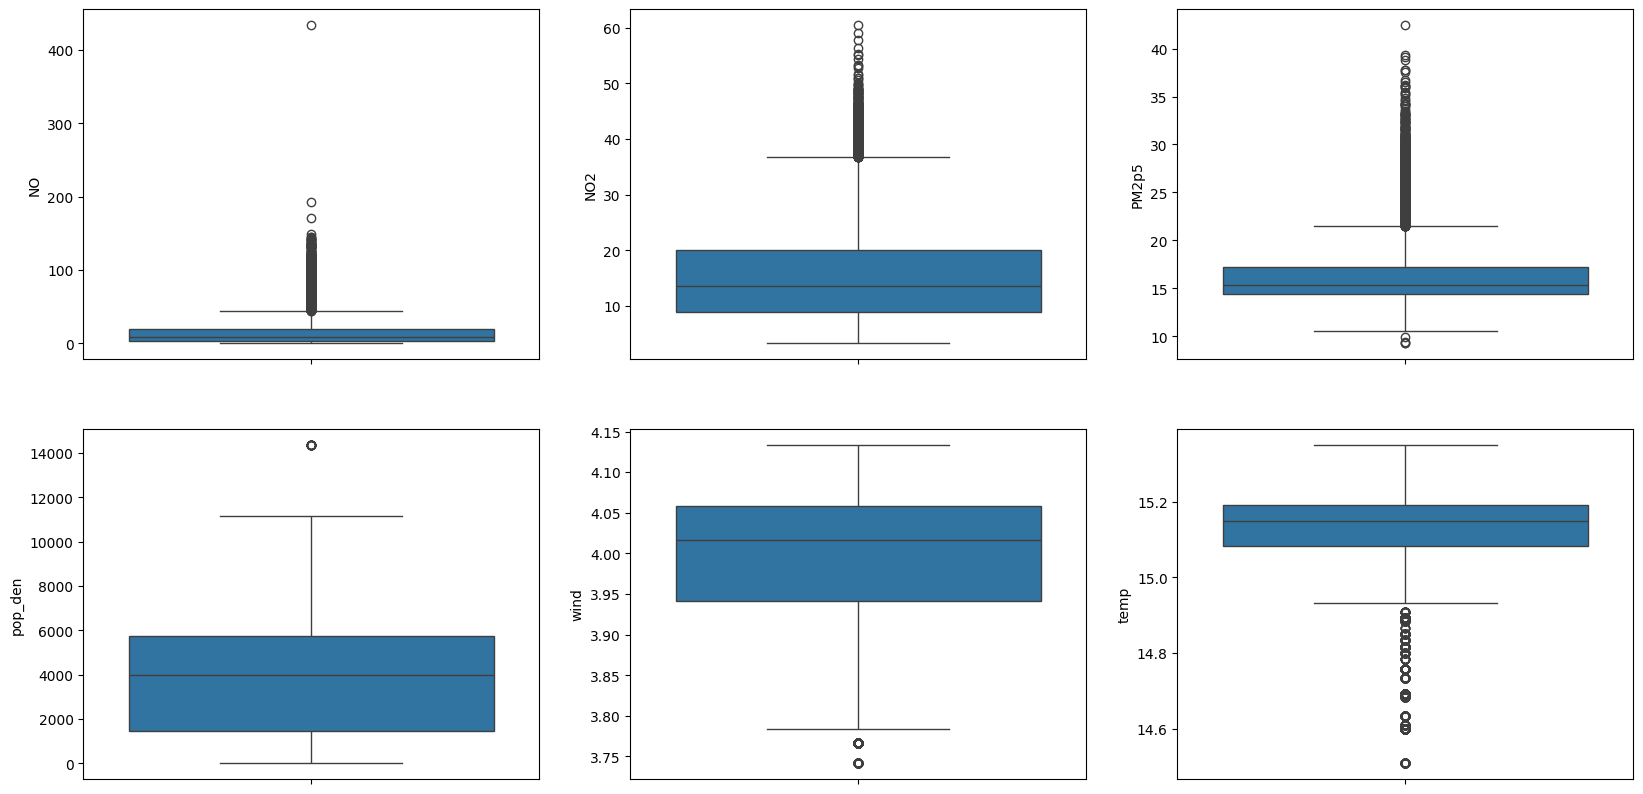

In [ ]:
# Checking outliers

_,axss = plt.subplots(2,3, figsize=[20,10])  # create a 2x3 matrix = 6 figures
sns.boxplot(y ='NO', data=df_1_out, ax=axss[0][0])
sns.boxplot(y ='NO2', data=df_1_out, ax=axss[0][1])
sns.boxplot(y ='PM2p5', data=df_1_out, ax=axss[0][2])
sns.boxplot(y ='pop_den', data=df_1_out, ax=axss[1][0])
sns.boxplot(y ='wind', data=df_1_out, ax=axss[1][1])
sns.boxplot(y ='temp', data=df_1_out, ax=axss[1][2])

In [ ]:
# Mannually remove outliers based on knowledge
# if NO > 200 -> let all of them equl to 200
df_1_out.loc[df_1_out['NO'] > 200, 'NO'] = 200

# 4.Feature Engineering

## Oakland city

In [ ]:
# Import oakland street and map data
Oakland_poly = ox.geocode_to_gdf('Oakland, California')

Oakland_poly

geometry  bbox_north  bbox_south  \
0  POLYGON ((-122.35588 37.83573, -122.35009 37.8...   37.885426   37.633676   

   bbox_east   bbox_west   place_id  osm_type   osm_id        lat         lon  \
0 -122.11442 -122.355881  311948230  relation  2833530  37.804456 -122.271356   

      class            type  place_rank  importance addresstype     name  \
0  boundary  administrative          16    0.631796        city  Oakland   

                                        display_name  
0  Oakland, Alameda County, California, United St...

<Axes: >

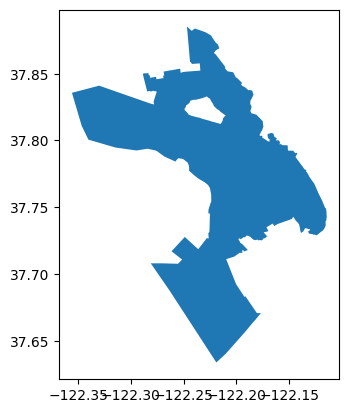

In [ ]:
Oakland_poly.plot()

### convert geo

In [ ]:
# Conver geometey object -> geo df
gpd_1_degree = gpd.GeoDataFrame(df_1_out, geometry = gpd.points_from_xy(df_1_out.Longitude, df_1_out.Latitude), crs='epsg:4326')

Oakland_poly.crs, gpd_1_degree.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [ ]:
gpd_1_degree.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

   road_type        zone   pop_den      wind       temp   Longitude  \
0   tertiary  industrial  8.336845  4.133333  14.950001 -122.322594   
1  secondary  industrial  8.336845  4.133333  14.950001 -122.322310   

    Latitude Respiratory_HI   Pt_CANCR  
0  37.806781           high  0.7 - 0.8  
1  37.806150           high  0.7 - 0.8

### Spatial-join

In [ ]:
# spatial-join the dataset of pollutant and health with the Oakland polygon grid
# (make sure all data represent Oakland city)

gpd_1_city = gpd.sjoin(gpd_1_degree, Oakland_poly, how="inner", predicate="intersects")

gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

   road_type        zone   pop_den      wind       temp  ...   osm_id  \
0   tertiary  industrial  8.336845  4.133333  14.950001  ...  2833530   
1  secondary  industrial  8.336845  4.133333  14.950001  ...  2833530   

         lat         lon     class            type  place_rank  importance  \
0  37.804456 -122.271356  boundary  administrative          16    0.631796   
1  37.804456 -122.271356  boundary  administrative          16    0.631796   

   addresstype     name                                       display_name  
0         city  Oakland  Oakland, Alameda County, California, United St...  
1         city  Oakland  Oakland, Alameda County, California, United St...  

[2 rows x 31 columns]

In [ ]:
# count unique values for each feature
print("*** Cnts of Each Feature ***")
print(gpd_1_city.nunique())

*** Cnts of Each Feature ***
index             18217
NO                15961
NO2               18161
PM2p5             18215
geometry          18215
road_type             6
zone                  5
pop_den              70
wind                 45
temp                 80
Longitude         18065
Latitude          18192
Respiratory_HI        3
Pt_CANCR              3
index_right           1
bbox_north            1
bbox_south            1
bbox_east             1
bbox_west             1
place_id              1
osm_type              1
osm_id                1
lat                   1
lon                   1
class                 1
type                  1
place_rank            1
importance            1
addresstype           1
name                  1
display_name          1
dtype: int64


In [ ]:
gpd_1_city = gpd_1_city.drop(['index_right', 'bbox_east', 'bbox_north', 'bbox_south', 'bbox_west'], axis=1)

## City structure: Roads

### city

In [ ]:
# (1) grab street data (roads and intersections) for entire city
oak_streets = ox.graph_from_place('Oakland, California', network_type = 'drive')
nodes, edges = ox.graph_to_gdfs(oak_streets)

In [ ]:
nodes.head(2)

y           x            highway  street_count  ref  \
osmid                                                                   
30362160  37.824005 -122.303118  motorway_junction             3  NaN   
30362888  37.825844 -122.303049  motorway_junction             3   8A   

                             geometry  
osmid                                  
30362160  POINT (-122.30312 37.82400)  
30362888  POINT (-122.30305 37.82584)

In [ ]:
# u (source node), v (target node)
edges.head(2)

osmid bridge  oneway   lanes  \
u        v        key                                                           
30362160 30365945 0    [4757680, 781148889, 710721718]    yes    True  [2, 1]   
         30366047 0                           32661316    yes    True       2   

                             highway maxspeed reversed   length  \
u        v        key                                             
30362160 30365945 0    motorway_link   55 mph    False  741.848   
         30366047 0         motorway   55 mph    False  175.700   

                                                                geometry  ref  \
u        v        key                                                           
30362160 30365945 0    LINESTRING (-122.30312 37.82400, -122.30418 37...  NaN   
         30366047 0    LINESTRING (-122.30312 37.82400, -122.30400 37...  NaN   

                      name tunnel access junction width  
u        v        key                                    
30362160 30365945 0    NaN    NaN    NaN      NaN   NaN  
         30366047 0    NaN    NaN    NaN      NaN   NaN

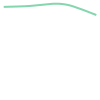

In [ ]:
edges.iloc[0,:].geometry

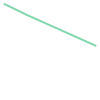

In [ ]:
edges.iloc[1,:].geometry

<Axes: >

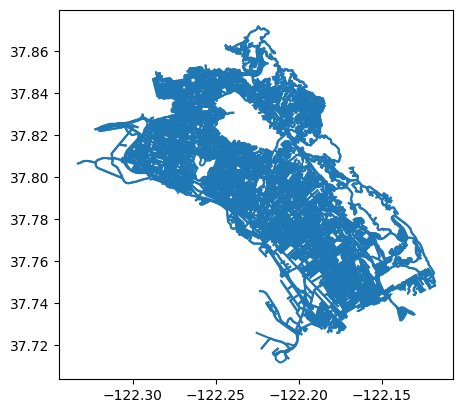

In [ ]:
edges.plot()

<Axes: >

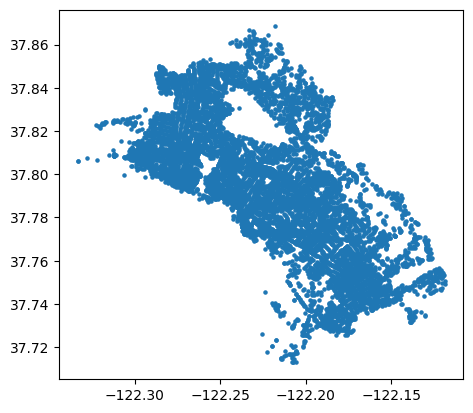

In [ ]:
nodes.plot(markersize=5)

### road

In [ ]:
# (2 - a) Identify roads
oakland_rds = edges.copy()
print(oakland_rds['highway'].value_counts())
print ("Num of rows: " + str(oakland_rds.shape[0])) # row count
print ("Num of columns: " + str(oakland_rds.shape[1])) # col count

highway
residential                        14916
secondary                           2896
tertiary                            2492
primary                              776
motorway_link                        325
unclassified                         243
motorway                             206
secondary_link                        96
trunk                                 62
tertiary_link                         40
trunk_link                            39
living_street                         24
primary_link                          14
[unclassified, residential]            4
[residential, living_street]           2
[motorway_link, motorway]              2
[motorway_link, secondary_link]        2
Name: count, dtype: int64
Num of rows: 22139
Num of columns: 15


In [ ]:
# (2 - b) Clean roads

# remove '_link' in xxx_link & add it to xxx
# (e.g., motorway_link is added on motorway )
oakland_rds['highway'] = oakland_rds['highway'].str.replace('_link', '')


# 'trunk'  -->  'secondary'
oakland_rds['highway'] = np.where(oakland_rds['highway'] == 'trunk', 'secondary', oakland_rds['highway'])


# 'living_street' --> 'residential'
oakland_rds['highway'] = np.where(oakland_rds['highway'] == 'living_street', 'residential', oakland_rds['highway'])

# Check results
print(oakland_rds['highway'].value_counts())

highway
residential     14940
secondary        3093
tertiary         2532
primary           790
motorway          531
unclassified      243
Name: count, dtype: int64


<Axes: xlabel='highway', ylabel='count'>

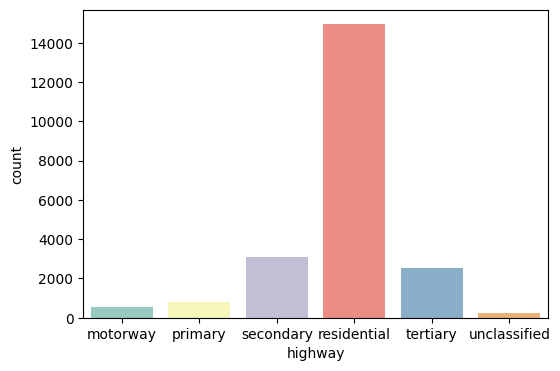

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=oakland_rds, x='highway', hue='highway', palette='Set3', legend=False)

### map

In [ ]:
# (3) Map them out

# grab subsets of roadtypes
oakland_highways = oakland_rds[oakland_rds.highway == 'motorway']
oakland_primary = oakland_rds[oakland_rds.highway == 'primary']
oakland_secondary = oakland_rds[oakland_rds.highway == 'secondary']
oakland_tertiary = oakland_rds[oakland_rds.highway == 'tertiary']
oakland_resid = oakland_rds[oakland_rds.highway == 'residential']

oakland_highways.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# # Highway
# fig, ax = plt.subplots(figsize=(12, 10))
# oakland_highways.to_crs(epsg=3857).plot(ax = ax,
#                 figsize=(12,12),
#                 markersize=40,
#                color="red",
#                edgecolor="white",
#                alpha=0.8,
#                marker="o"
#             );
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
# # Primary road
# fig, ax = plt.subplots(figsize=(12, 10))
# oakland_primary.to_crs(epsg=3857).plot(ax = ax,
#                 figsize=(12,12),
#                 markersize=40,
#                color="blue",
#                edgecolor="white",
#                alpha=0.8,
#                marker="o"
#             );
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
# # Secondary road
# fig, ax = plt.subplots(figsize=(12, 10))
# oakland_secondary.to_crs(epsg=3857).plot(ax = ax,
#                 figsize=(12,12),
#                 markersize=40,
#                color="green",
#                edgecolor="white",
#                alpha=0.8,
#                marker="o"
#             );
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
# # Primary & Secondary

# fig, ax = plt.subplots(figsize=(12, 10))
# oakland_primary.to_crs(epsg=3857).plot(ax = ax,
#                 figsize=(12,12),
#                 markersize=40,
#                color="blue",
#                edgecolor="white",
#                alpha=0.8,
#                marker="o"
#             );
# oakland_secondary.to_crs(epsg=3857).plot(ax = ax,
#                 figsize=(12,12),
#                 markersize=40,
#                color="green",
#                edgecolor="white",
#                alpha=0.8,
#                marker="o"
#             );

# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
# # Tertiary road
# fig, ax = plt.subplots(figsize=(12, 10))
# oakland_tertiary.to_crs(epsg=3857).plot(ax = ax,
#                 figsize=(12,12),
#                 markersize=40,
#                color="purple",
#                edgecolor="white",
#                alpha=0.8,
#                marker="o"
#             );
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

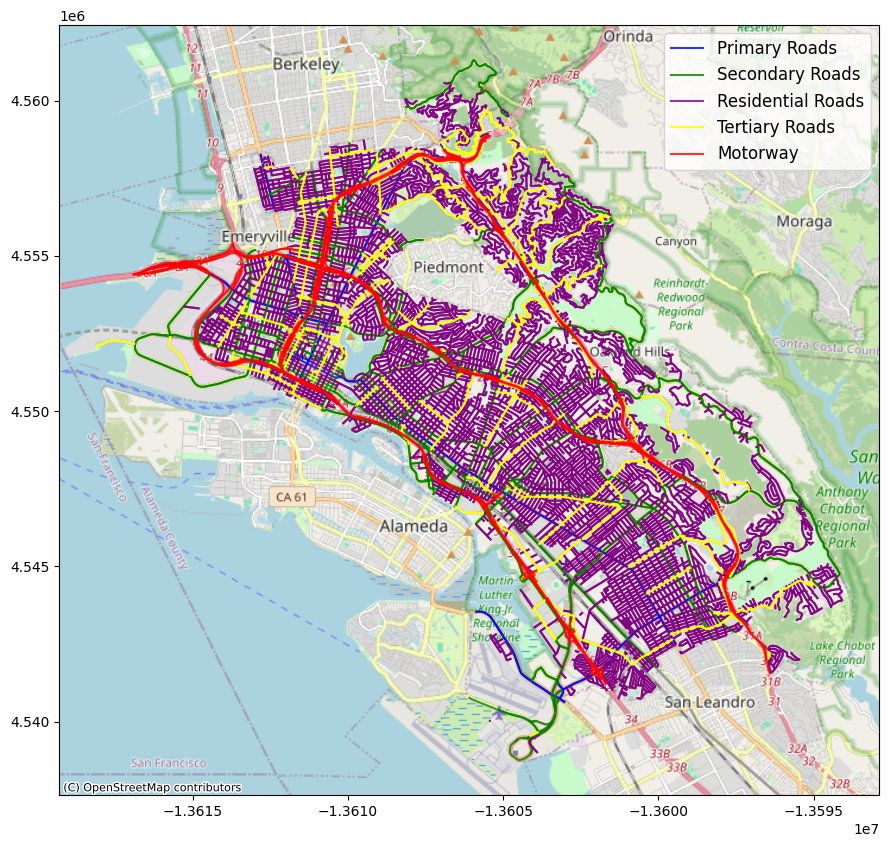

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
oakland_primary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                label="Primary Roads",
                markersize=40,
               color="blue",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
oakland_secondary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                label="Secondary Roads",
                markersize=40,
               color="green",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
oakland_resid.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                label="Residential Roads",
                markersize=40,
               color="purple",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
oakland_tertiary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                label="Tertiary Roads",
                markersize=40,
               color="yellow",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
oakland_highways.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
                label="Motorway",
               color="red",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );

# Add legend to the plot
ax.legend(loc='upper right', fontsize='large')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

### road distance

In [ ]:
gpd_1_city.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Conver geometey from degree -> meter (utm: unit in meter)
# 'epsg:32610' == meter
# 'epsg:4326' == degree
gpd_1_city_utm = gpd_1_city.to_crs('epsg:32610').copy()      # much faster to do the re-projection to meters
highway_utm = oakland_highways.to_crs('epsg:32610').copy()
primary_utm = oakland_primary.to_crs('epsg:32610').copy()
secondary_utm = oakland_secondary.to_crs('epsg:32610').copy()
tertiary_utm = oakland_tertiary.to_crs('epsg:32610').copy()


# user-defined function
def distance_to_roadway(gps, roadway):
    '''Calculate distance from GPS point to nearest road line polygon'''
    dists = []
    for i in roadway.geometry:
        dists.append(i.distance(gps))
    return(np.min(dists))


# # Calculate distance to nearest major roadway
# gpd_1_city['closest_highway'] = gpd_1_city_utm['geometry'].apply(distance_to_roadway, roadway = highway_utm)
# gpd_1_city['closest_primary'] = gpd_1_city_utm['geometry'].apply(distance_to_roadway, roadway = primary_utm)
# gpd_1_city['closest_secondary'] = gpd_1_city_utm['geometry'].apply(distance_to_roadway, roadway = secondary_utm)
# gpd_1_city['closest_tertiary'] = gpd_1_city_utm['geometry'].apply(distance_to_roadway, roadway = tertiary_utm)

In [ ]:
oakland_highways.geometry

u           v           key
30362160    30365945    0      LINESTRING (-122.30312 37.82400, -122.30418 37...
            30366047    0      LINESTRING (-122.30312 37.82400, -122.30400 37...
30362888    1943438853  0      LINESTRING (-122.30305 37.82584, -122.30455 37...
            30363957    0      LINESTRING (-122.30305 37.82584, -122.30463 37...
30363957    30364093    0      LINESTRING (-122.30703 37.82548, -122.30711 37...
                                                     ...                        
7786374367  53003777    0      LINESTRING (-122.29847 37.82633, -122.29760 37...
8628906438  217595718   0      LINESTRING (-122.18323 37.78415, -122.18363 37...
9057481085  9057481086  0      LINESTRING (-122.27601 37.80865, -122.27584 37...
9057481088  4168206764  0      LINESTRING (-122.27940 37.80584, -122.27947 37...
9561732916  7298373566  0      LINESTRING (-122.23291 37.85130, -122.23292 37...
Name: geometry, Length: 531, dtype: geometry

In [ ]:
highway_utm.geometry

u           v           key
30362160    30365945    0      LINESTRING (561330.689 4186517.033, 561236.607...
            30366047    0      LINESTRING (561330.689 4186517.033, 561252.642...
30362888    1943438853  0      LINESTRING (561335.231 4186721.117, 561203.559...
            30363957    0      LINESTRING (561335.231 4186721.117, 561196.642...
30363957    30364093    0      LINESTRING (560984.828 4186677.767, 560977.785...
                                                     ...                        
7786374367  53003777    0      LINESTRING (561737.408 4186778.296, 561814.448...
8628906438  217595718   0      LINESTRING (571920.493 4182180.890, 571885.177...
9057481085  9057481086  0      LINESTRING (563729.529 4184832.057, 563744.562...
9057481088  4168206764  0      LINESTRING (563433.759 4184516.949, 563427.095...
9561732916  7298373566  0      LINESTRING (567484.631 4189593.964, 567483.878...
Name: geometry, Length: 531, dtype: geometry

In [ ]:
# Calculate the distance from each geometry in gpd_1_city_utm to the nearest roadway (stored in highway_utm GeoDataFrame)
tqdm.pandas()

gpd_1_city['closest_highway'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = highway_utm)
# gpd_1_city['closest_highway'] = gpd_1_city['geometry'].apply(distance_to_roadway, roadway = highway_utm)

100%|██████████| 18217/18217 [03:15<00:00, 93.10it/s] 


In [ ]:
# Calculate distance to nearest primary road
tqdm.pandas()
gpd_1_city['closest_primary'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = primary_utm)

100%|██████████| 18217/18217 [04:38<00:00, 65.31it/s]


In [ ]:
# Calculate distance to nearest secondary road
tqdm.pandas()
gpd_1_city['closest_secondary'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = secondary_utm)

100%|██████████| 18217/18217 [18:33<00:00, 16.36it/s]


In [ ]:
# Calculate distance to nearest tertiary road
tqdm.pandas()
gpd_1_city['closest_tertiary'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = tertiary_utm)

100%|██████████| 18217/18217 [14:33<00:00, 20.85it/s]


In [ ]:
gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

   road_type        zone   pop_den      wind       temp  ...            type  \
0   tertiary  industrial  8.336845  4.133333  14.950001  ...  administrative   
1  secondary  industrial  8.336845  4.133333  14.950001  ...  administrative   

   place_rank importance addresstype     name  \
0          16   0.631796        city  Oakland   
1          16   0.631796        city  Oakland   

                                        display_name  closest_highway  \
0  Oakland, Alameda County, California, United St...      1529.354679   
1  Oakland, Alameda County, California, United St...      1510.616902   

   closest_primary  closest_secondary closest_tertiary  
0      2576.575272       3.000134e+01         0.003395  
1      2605.774822       5.010205e-08        63.387249  

[2 rows x 30 columns]

## City Structure: traffic signal & stop sign

### identify

In [ ]:
nodes.head(2)

y           x            highway  street_count  ref  \
osmid                                                                   
30362160  37.824005 -122.303118  motorway_junction             3  NaN   
30362888  37.825844 -122.303049  motorway_junction             3   8A   

                             geometry  
osmid                                  
30362160  POINT (-122.30312 37.82400)  
30362888  POINT (-122.30305 37.82584)

In [ ]:
# (1) Identify traffic signals & stop signs
nodes['highway'].value_counts()

highway
traffic_signals      790
stop                 357
turning_circle       321
motorway_junction    135
crossing              10
mini_roundabout        3
trailhead              3
turning_loop           1
Name: count, dtype: int64

In [ ]:
nodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### map

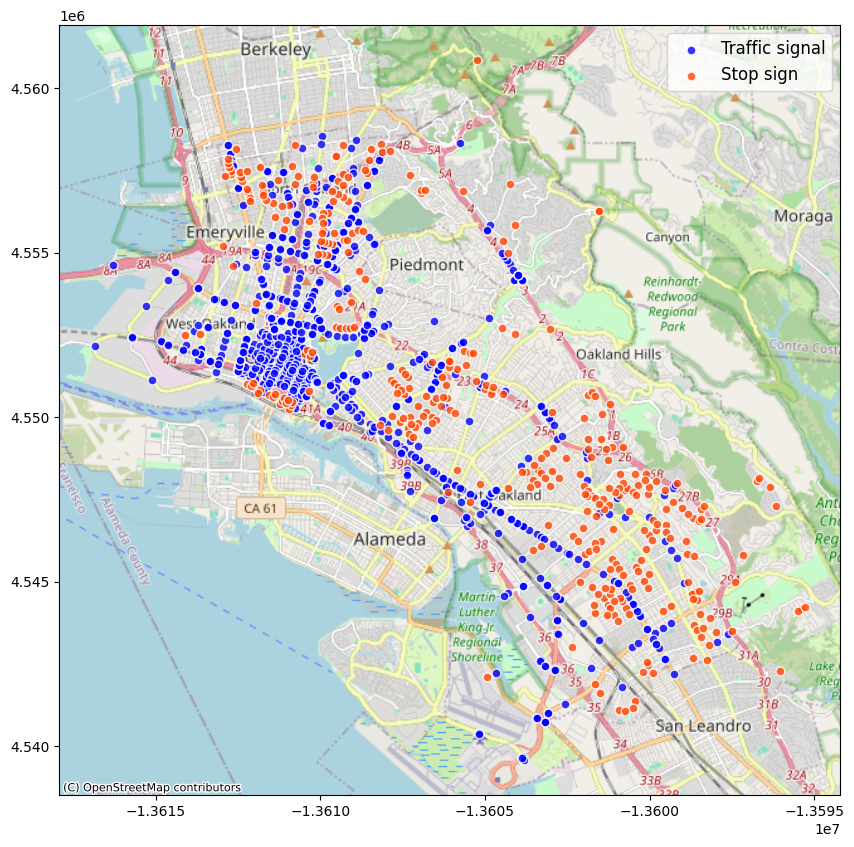

In [ ]:
# (2) Map them out

trafic_signals = nodes[nodes['highway'] == 'traffic_signals']
stop_cross = nodes[nodes['highway'] == 'stop']


# Traffic signal: blue
# Stop sign: red
fig, ax = plt.subplots(figsize=(12, 10))
trafic_signals.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
                label="Traffic signal",
               color="blue",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
stop_cross.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
                label="Stop sign",
               color="orangered",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );

# Add legend to the plot
ax.legend(loc='upper right', fontsize='large')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

### intersection & traffic signal

In [ ]:
# (3 - a) Conver geometey from degree -> meter (utm: unit in meter)
# 'epsg:32610' == meter
# 'epsg:4326' == degree
traffic_sig_utm = trafic_signals.to_crs('epsg:32610').copy()    # much faster to do the re-projection to meters
stop_sign_utm = stop_cross.to_crs('epsg:32610').copy()


# (3 - b) user defined function

def nearest_intersection(gps, intersections):
    ''' Calculates distance from GPS point to nearest intersection'''
    closest_point = nearest_points(gps, MultiPoint(intersections.values))[1]
    return(gps.distance(closest_point))

In [ ]:
# (3 - c) Calculate distance to nearest traffic signal
tqdm.pandas()
gpd_1_city['trafic_signal_dist'] = gpd_1_city_utm['geometry'].progress_apply(nearest_intersection, intersections = traffic_sig_utm['geometry'])
# gpd_1_city['trafic_signal_dist'] = gpd_1_city['geometry'].apply(nearest_intersection, intersections = traffic_sig_utm['geometry'])

100%|██████████| 18217/18217 [03:43<00:00, 81.56it/s]


In [ ]:
# (3 - c) Calculate distance to nearest traffic signal
tqdm.pandas()
gpd_1_city['stop_sign_dist'] = gpd_1_city_utm['geometry'].progress_apply(nearest_intersection, intersections = stop_sign_utm['geometry'])

100%|██████████| 18217/18217 [01:37<00:00, 187.10it/s]


## Category Encoding

In [ ]:
gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

   road_type        zone   pop_den      wind       temp  ...  importance  \
0   tertiary  industrial  8.336845  4.133333  14.950001  ...    0.631796   
1  secondary  industrial  8.336845  4.133333  14.950001  ...    0.631796   

   addresstype     name                                       display_name  \
0         city  Oakland  Oakland, Alameda County, California, United St...   
1         city  Oakland  Oakland, Alameda County, California, United St...   

   closest_highway closest_primary  closest_secondary  closest_tertiary  \
0      1529.354679     2576.575272       3.000134e+01          0.003395   
1      1510.616902     2605.774822       5.010205e-08         63.387249   

   trafic_signal_dist stop_sign_dist  
0           30.001344    2213.782527  
1           63.387249    2198.173072  

[2 rows x 32 columns]

In [ ]:
zone = gpd_1_city['zone']
road_type = gpd_1_city['road_type']

In [ ]:
# One-hot encoding: convert category features to numerical features（0 & 1） - spliting into diff columns
gpd_1_city = pd.get_dummies(gpd_1_city, columns=['road_type'], drop_first=False)      # drop_first=False: do not remove a lable to reduce multicollision
gpd_1_city = pd.get_dummies(gpd_1_city, columns=['zone'], drop_first=False)

gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

    pop_den      wind       temp   Longitude   Latitude  ...  \
0  8.336845  4.133333  14.950001 -122.322594  37.806781  ...   
1  8.336845  4.133333  14.950001 -122.322310  37.806150  ...   

  road_type_primary road_type_residential  road_type_secondary  \
0             False                 False                False   
1             False                 False                 True   

  road_type_tertiary  road_type_unclassified  zone_commercial  \
0               True                   False            False   
1              False                   False            False   

   zone_industrial zone_mixed zone_open_space  zone_residential  
0             True      False           False             False  
1             True      False           False             False  

[2 rows x 41 columns]

In [ ]:
# Merge them back - for visualization
# axis = 1: rows invariant，but features increased
gpd_1_city = pd.concat([gpd_1_city, zone], axis = 1)
gpd_1_city = pd.concat([gpd_1_city, road_type], axis = 1)

gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

    pop_den      wind       temp   Longitude   Latitude  ...  \
0  8.336845  4.133333  14.950001 -122.322594  37.806781  ...   
1  8.336845  4.133333  14.950001 -122.322310  37.806150  ...   

  road_type_secondary road_type_tertiary  road_type_unclassified  \
0               False               True                   False   
1                True              False                   False   

  zone_commercial  zone_industrial  zone_mixed  zone_open_space  \
0           False             True       False            False   
1           False             True       False            False   

  zone_residential        zone  road_type  
0            False  industrial   tertiary  
1            False  industrial  secondary  

[2 rows x 43 columns]

## Data Preparation

In [ ]:
gpd_1_city.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 18217 entries, 0 to 18218
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   index                   18217 non-null  int64   
 1   NO                      18217 non-null  float64 
 2   NO2                     18217 non-null  float64 
 3   PM2p5                   18217 non-null  float64 
 4   geometry                18217 non-null  geometry
 5   pop_den                 18217 non-null  float64 
 6   wind                    18217 non-null  float64 
 7   temp                    18217 non-null  float64 
 8   Longitude               18217 non-null  float64 
 9   Latitude                18217 non-null  float64 
 10  Respiratory_HI          18217 non-null  object  
 11  Pt_CANCR                18217 non-null  object  
 12  place_id                18217 non-null  int64   
 13  osm_type                18217 non-null  object  
 14  osm_id             

### drop

In [ ]:
# Drop features
gpd_1_city = gpd_1_city.drop(['index', 'Pt_CANCR'], axis=1)

### health conversion

In [ ]:
# if df['Respiratory_HI'] contains 'high', replace "high" to "3" and save into df['Respiratory_HI']
gpd_1_city['Respiratory_HI'] = np.where(gpd_1_city['Respiratory_HI'].str.contains('high'), '3', gpd_1_city['Respiratory_HI'])

# if df['Respiratory_HI'] contains 'moderate', replace "moderate" to "2" and save into df['Respiratory_HI']
gpd_1_city['Respiratory_HI'] = np.where(gpd_1_city['Respiratory_HI'].str.contains('moderate'), '2', gpd_1_city['Respiratory_HI'])

# if df['Respiratory_HI'] contains 'low', replace "low" to "1" and save into df['Respiratory_HI']
gpd_1_city['Respiratory_HI'] = np.where(gpd_1_city['Respiratory_HI'].str.contains('low'), '1', gpd_1_city['Respiratory_HI'])

# convert object to float
gpd_1_city["Respiratory_HI"] = gpd_1_city.Respiratory_HI.astype(float)

gpd_1_city.head(3)
# gpd_1_city.Respiratory_HI.value_counts()

NO        NO2      PM2p5                     geometry   pop_den  \
0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)  8.336845   
1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)  8.336845   
2  23.611111  23.967768  16.210698  POINT (-122.32230 37.80642)  8.336845   

       wind       temp   Longitude   Latitude  Respiratory_HI  ...  \
0  4.133333  14.950001 -122.322594  37.806781             3.0  ...   
1  4.133333  14.950001 -122.322310  37.806150             3.0  ...   
2  4.133333  14.950001 -122.322301  37.806420             3.0  ...   

   road_type_secondary road_type_tertiary  road_type_unclassified  \
0                False               True                   False   
1                 True              False                   False   
2                 True              False                   False   

   zone_commercial  zone_industrial zone_mixed zone_open_space  \
0            False             True      False           False   
1            False             True      False           False   
2            False             True      False           False   

   zone_residential        zone  road_type  
0             False  industrial   tertiary  
1             False  industrial  secondary  
2             False  industrial  secondary  

[3 rows x 41 columns]

In [ ]:
gpd_1_city.zone.value_counts()

zone
residential    9871
mixed          3485
commercial     3218
industrial     1419
open_space      224
Name: count, dtype: int64

In [ ]:
gpd_1_city.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 18217 entries, 0 to 18218
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   NO                      18217 non-null  float64 
 1   NO2                     18217 non-null  float64 
 2   PM2p5                   18217 non-null  float64 
 3   geometry                18217 non-null  geometry
 4   pop_den                 18217 non-null  float64 
 5   wind                    18217 non-null  float64 
 6   temp                    18217 non-null  float64 
 7   Longitude               18217 non-null  float64 
 8   Latitude                18217 non-null  float64 
 9   Respiratory_HI          18217 non-null  float64 
 10  place_id                18217 non-null  int64   
 11  osm_type                18217 non-null  object  
 12  osm_id                  18217 non-null  int64   
 13  lat                     18217 non-null  float64 
 14  lon                

### Numerical & Categorical

In [ ]:
# Numerical Features
numerical = ['NO', 'NO2', 'PM2p5', 'pop_den', 'wind', 'temp', 'closest_highway', 'closest_primary', 'closest_secondary', 'closest_tertiary',
             'trafic_signal_dist', 'stop_sign_dist', 'road_type_motorway', 'road_type_primary', 'road_type_residential', 'road_type_secondary', 'road_type_tertiary',
             'road_type_unclassified', 'zone_commercial', 'zone_industrial', 'zone_mixed', 'zone_open_space', 'zone_residential', 'Longitude', 'Latitude', 'Respiratory_HI']

# Categorical Features
categorical = ['geometry', 'zone', 'road_type']

# 5.Data Visualization

In [ ]:
df_vis = gpd_1_city.copy()

## Correlation Matrix

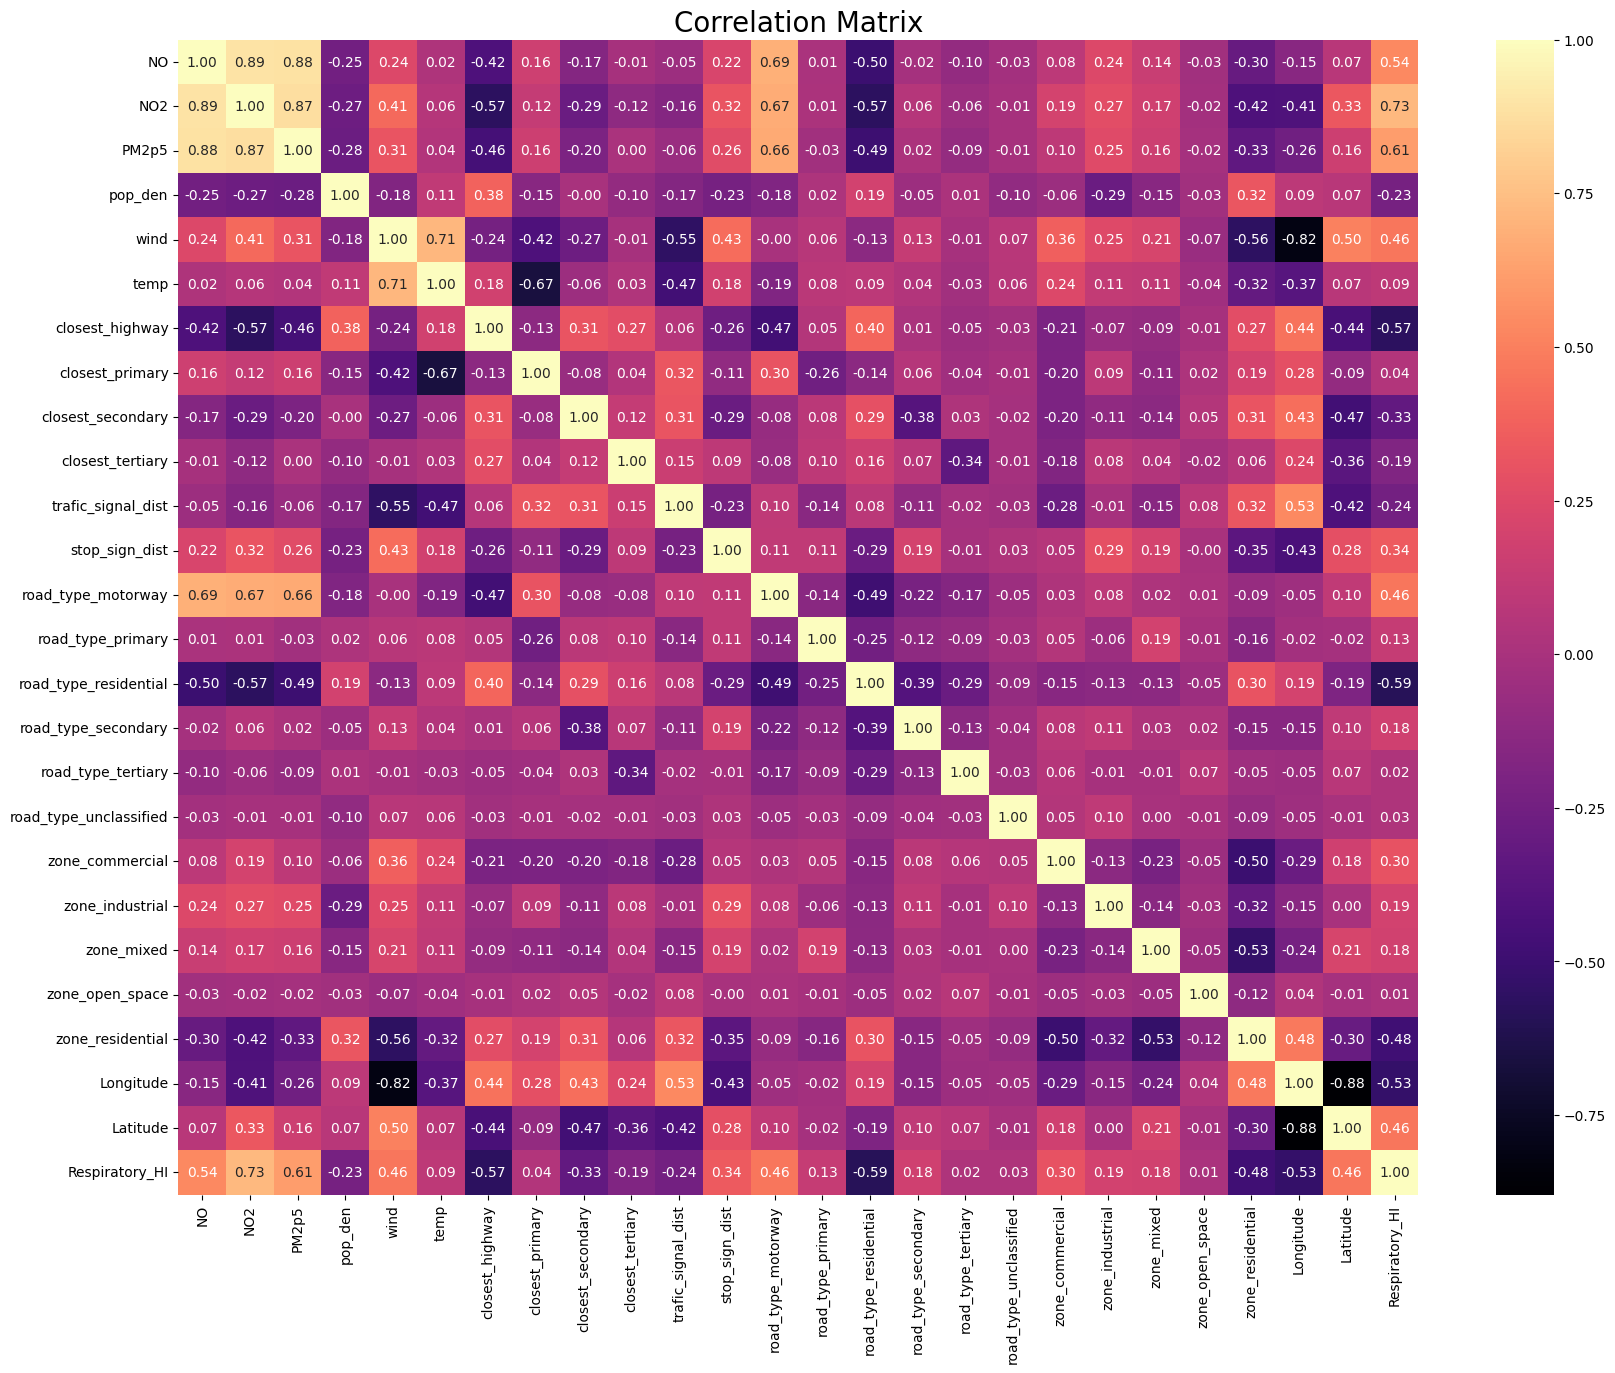

In [ ]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df_vis[numerical].corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
Corr = pd.DataFrame(df_vis[numerical].corr()['Respiratory_HI'].sort_values(ascending=False))
Corr = Corr.iloc[1:,:]
Corr.columns=['Target Correlation']
Corr

Target Correlation
NO2                               0.728081
PM2p5                             0.613451
NO                                0.535749
Latitude                          0.462277
road_type_motorway                0.459102
wind                              0.458172
stop_sign_dist                    0.343859
zone_commercial                   0.300532
zone_industrial                   0.192210
zone_mixed                        0.183287
road_type_secondary               0.175741
road_type_primary                 0.129546
temp                              0.094374
closest_primary                   0.040284
road_type_unclassified            0.025229
road_type_tertiary                0.024695
zone_open_space                   0.005282
closest_tertiary                 -0.186482
pop_den                          -0.230703
trafic_signal_dist               -0.244327
closest_secondary                -0.326670
zone_residential                 -0.479285
Longitude                        -0.534230
closest_highway                  -0.566352
road_type_residential            -0.592468

<ipython-input-266-1ca6f1c6d2e4>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g0 = sns.barplot(x="Target Correlation", y=Corr.index, data=Corr, hue=Corr.index, palette='Greens_r', ci=None, legend=False)


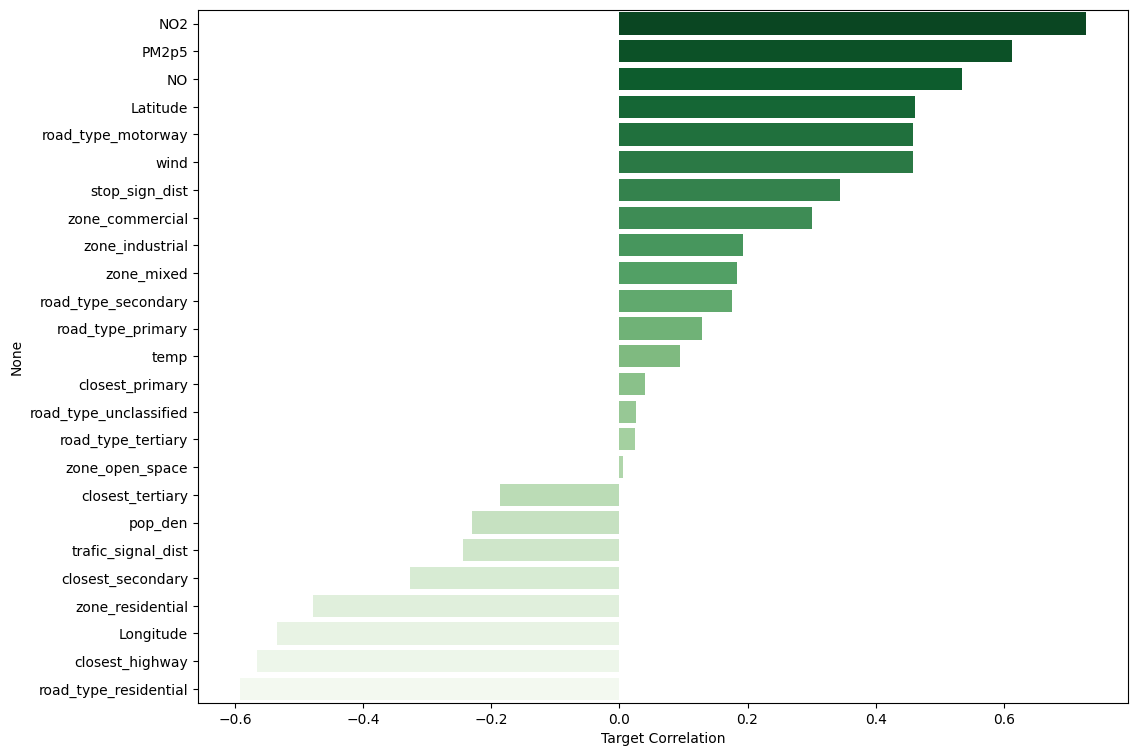

In [ ]:
g0 = sns.barplot(x="Target Correlation", y=Corr.index, data=Corr, hue=Corr.index, palette='Greens_r', ci=None, legend=False)
g0.figure.set_size_inches(12, 9)

1.   NO2 is easy to invade the deep fine bronchial tubes and alveoli of the respiratory tract, and long-term inhalation at low concentrations can lead to damage of lung tissues and cause pulmonary edema. Some studies have shown that an increase in bronchiolitis symptoms in asthmatic children is associated with long-term exposure to NO2.
2.   PM2.5 into the lungs has a blocking effect on local tissues, which can make the ventilation function of local bronchial tubes decrease, and the ventilation function of fine bronchial tubes and alveoli is lost. PM2.5 adsorbed with harmful gases can stimulate or corrode the alveolar wall, long-term effect can make the respiratory defense function is damaged, bronchitis, emphysema and bronchial asthma.



In [ ]:
gpd_1_vis = gpd_1_city.copy()

## map

Text(0, 0.5, 'Latitude')

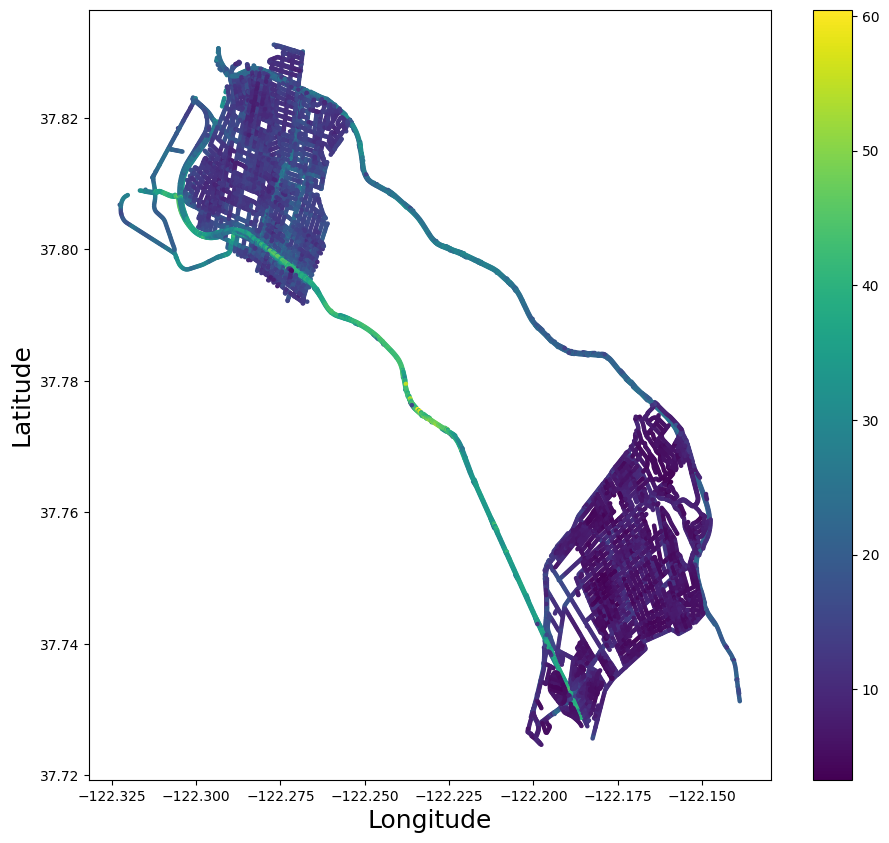

In [ ]:
# Plot the overall heatmap that will go into the web-app
plt.figure(figsize = (11, 10))
plt.scatter(gpd_1_vis.Longitude, gpd_1_vis.Latitude, s=5, c = gpd_1_vis.NO2)
plt.colorbar(); plt.xlabel('Longitude', fontsize=18); plt.ylabel('Latitude', fontsize=18)

Text(0, 0.5, 'Latitude')

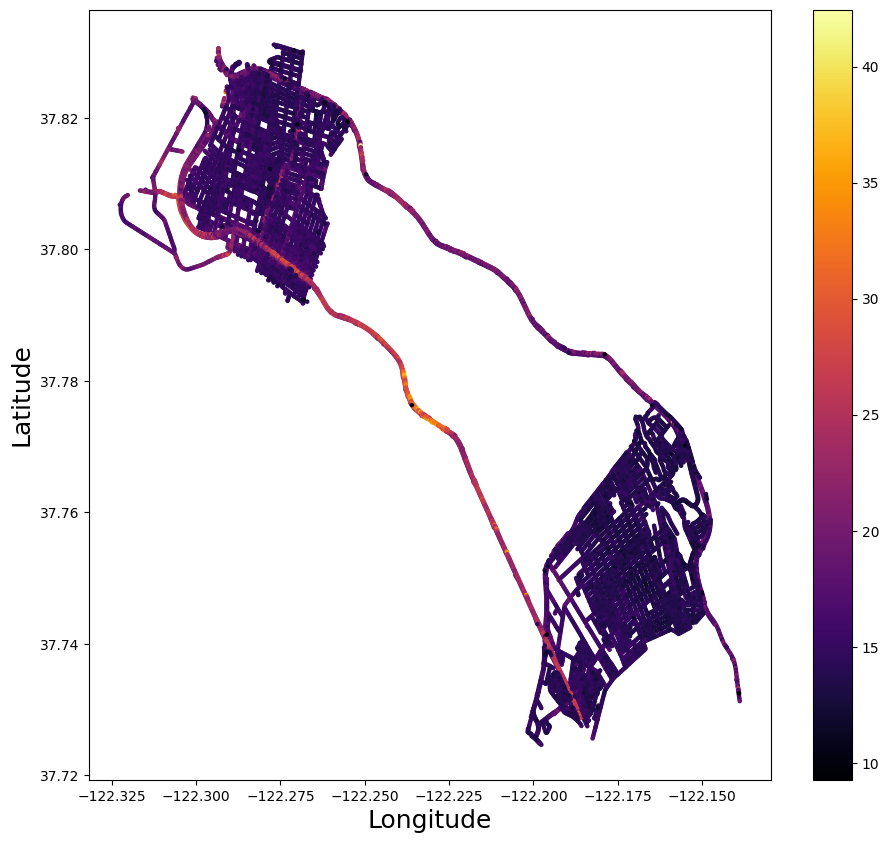

In [ ]:
# Plot the overall heatmap that will go into the web-app
plt.figure(figsize = (11, 10))
plt.scatter(gpd_1_vis.Longitude, gpd_1_vis.Latitude, s=5, c = gpd_1_vis.PM2p5, cmap='inferno')
plt.colorbar(); plt.xlabel('Longitude', fontsize=18); plt.ylabel('Latitude', fontsize=18)

## boxplot - roads

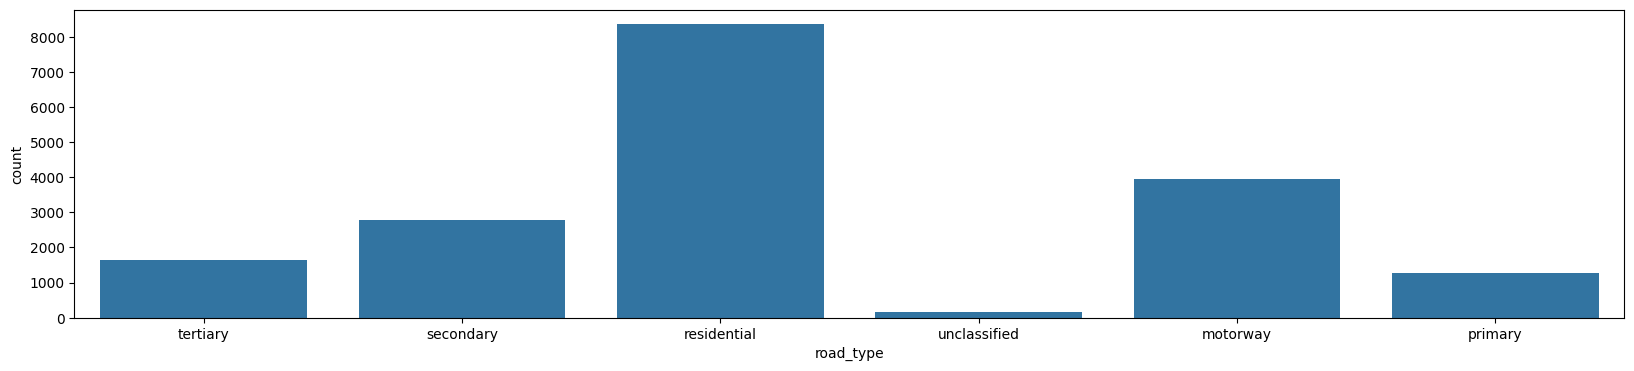

In [ ]:
# Check the sizes of data count
plt.figure(figsize=(20,4))
sns.countplot(x = 'road_type', data = df_vis);

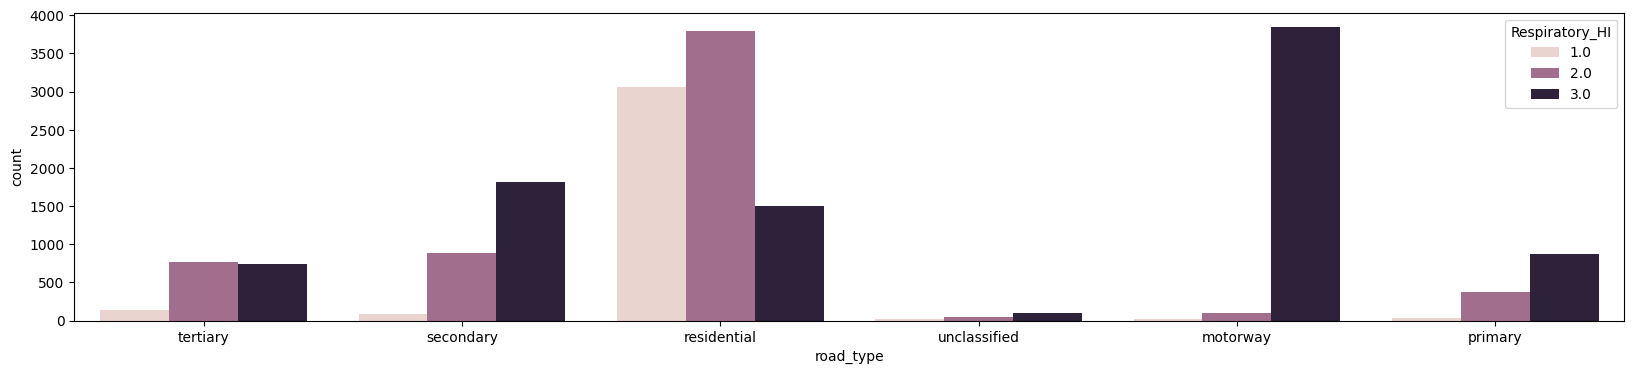

In [ ]:
# Road type & health
plt.figure(figsize=(20,4))
sns.countplot(x = 'road_type', hue = df_vis['Respiratory_HI'], data = df_vis);

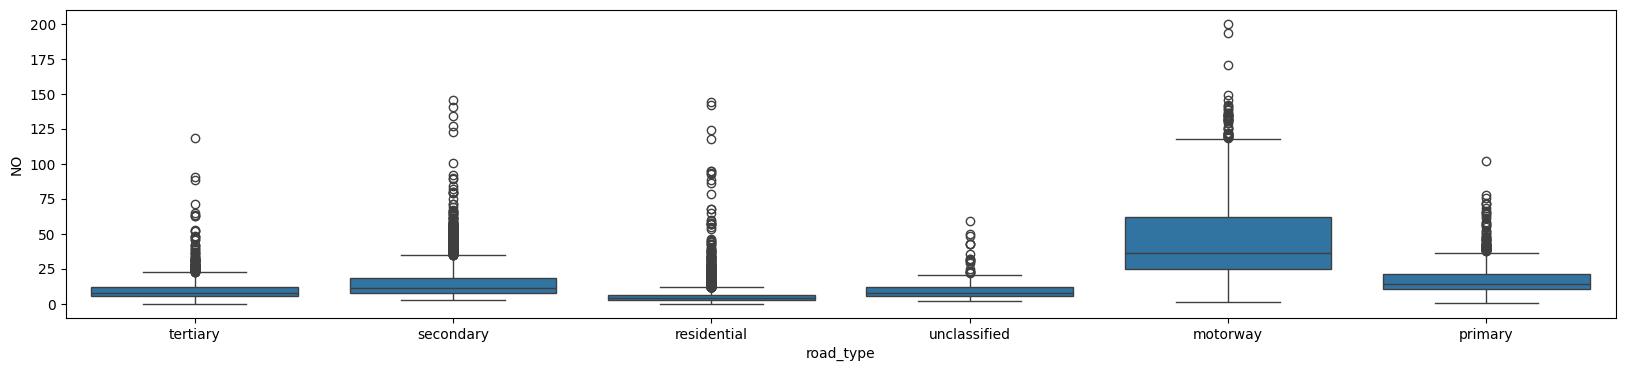

In [ ]:
# NO: road type
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['road_type'], y = df_vis['NO']);

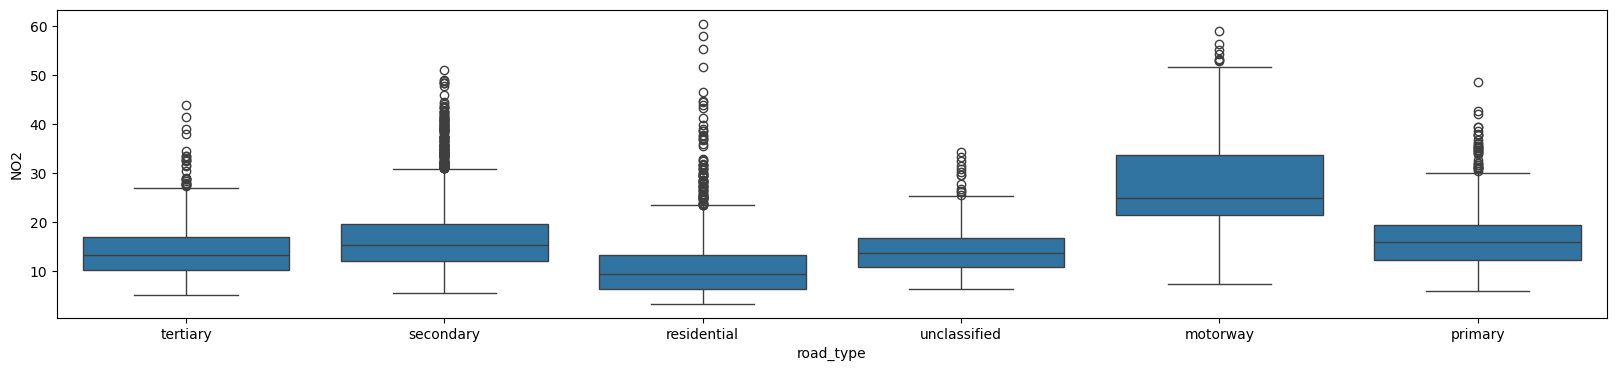

In [ ]:
# NO2: road type
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['road_type'], y = df_vis['NO2']);

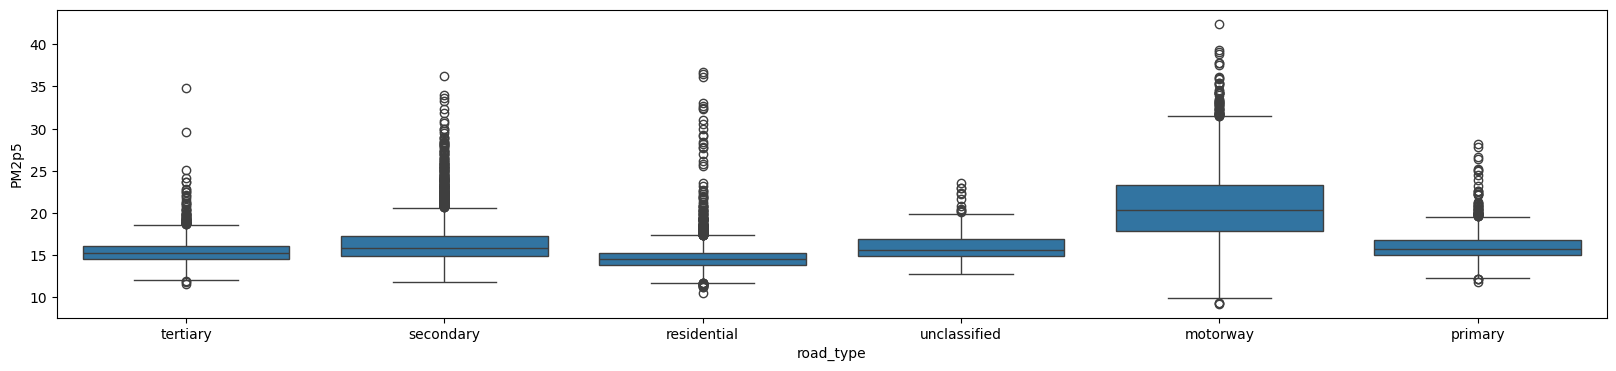

In [ ]:
# PM2.5: road type
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['road_type'], y = df_vis['PM2p5']);

## boxplot - zones

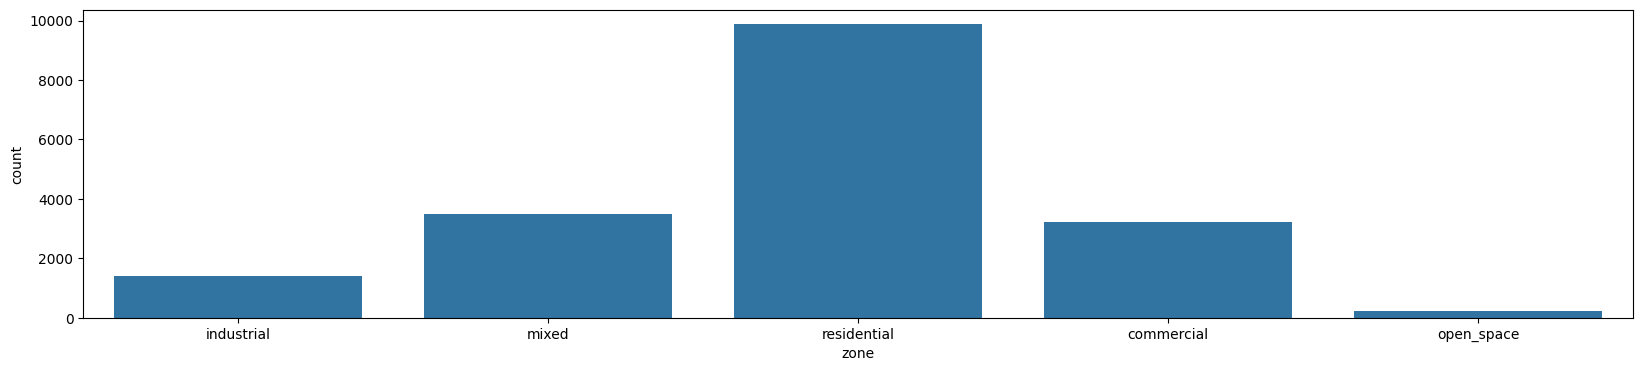

In [ ]:
# Check the sizes of data count
plt.figure(figsize=(20,4))
sns.countplot(x = 'zone', data = df_vis);

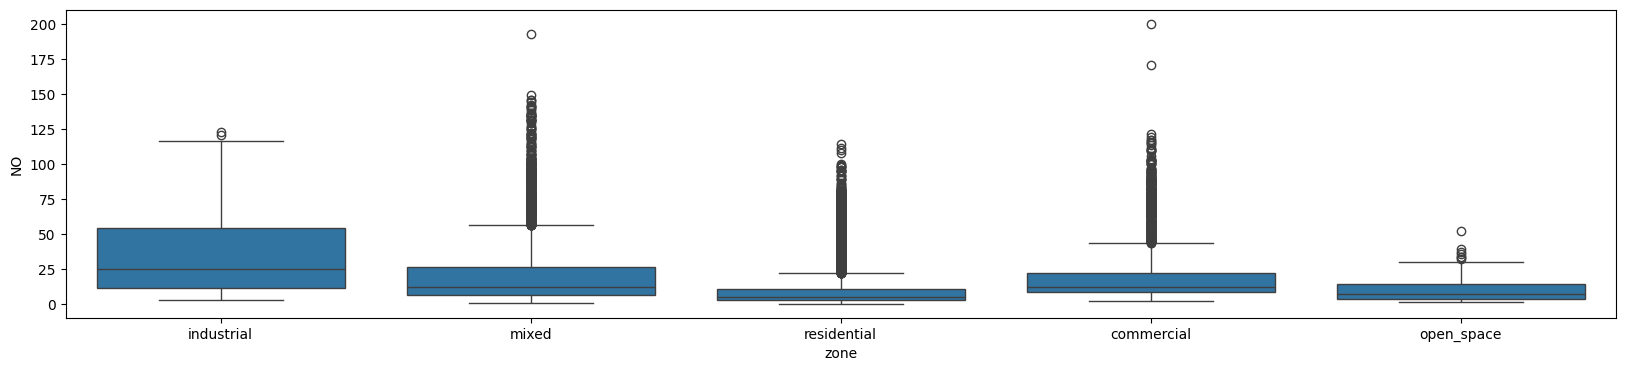

In [ ]:
# NO: zone
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['zone'], y = df_vis['NO']);

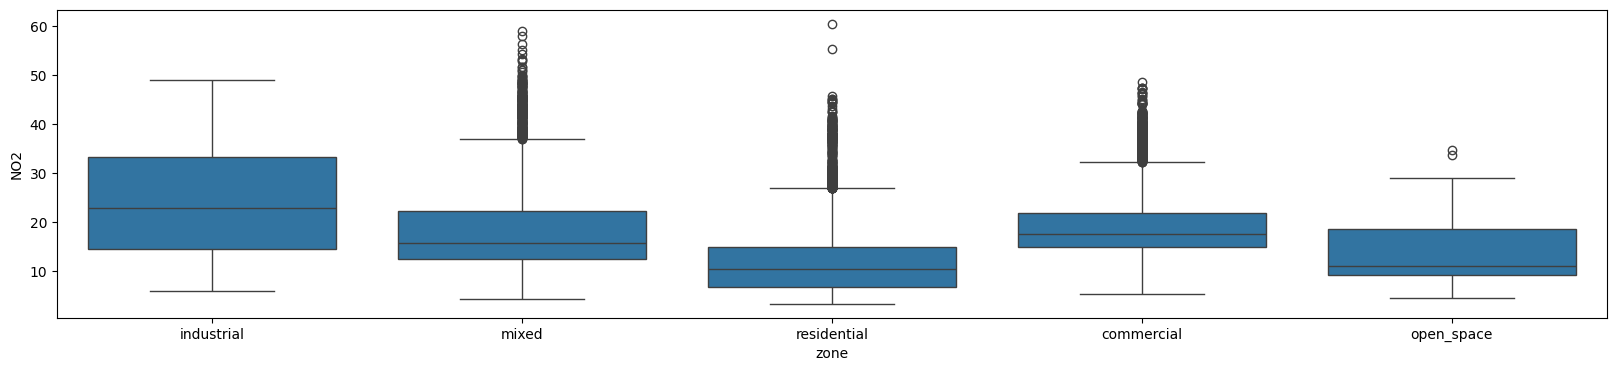

In [ ]:
# NO2: zone
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['zone'], y = df_vis['NO2']);

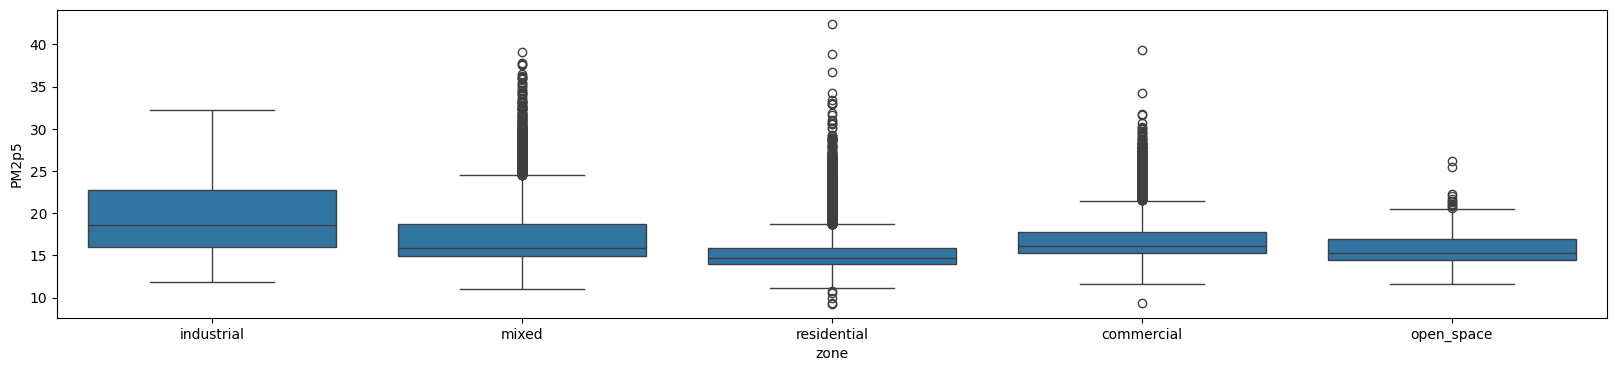

In [ ]:
# PM2.5: zone
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['zone'], y = df_vis['PM2p5']);

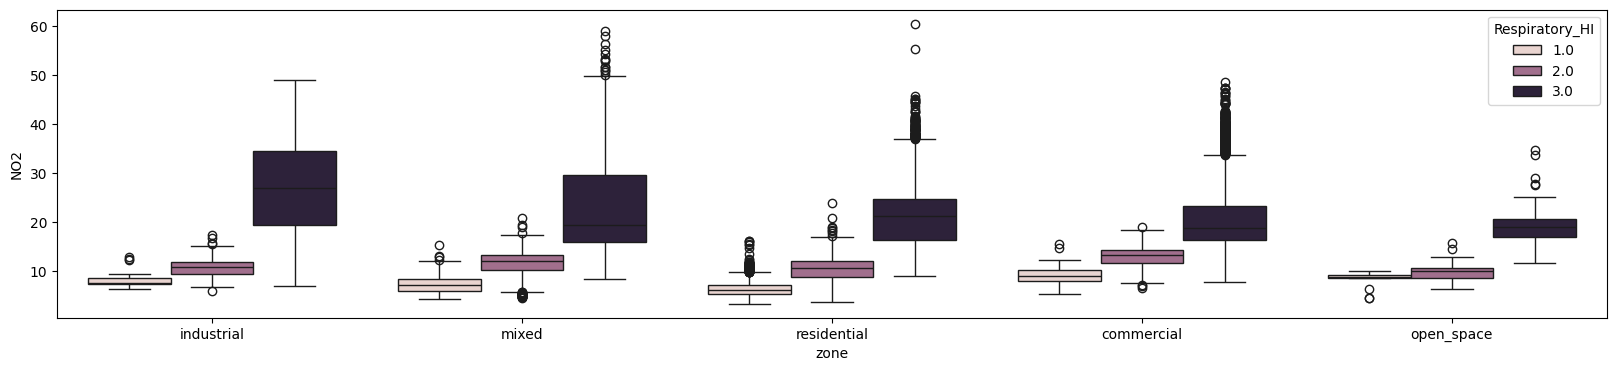

In [ ]:
# NO2: zone & health
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['zone'], y = df_vis['NO2'], hue = df_vis['Respiratory_HI']);

## distance

Text(0, 0.5, 'PM2.5 (ug/m3)')

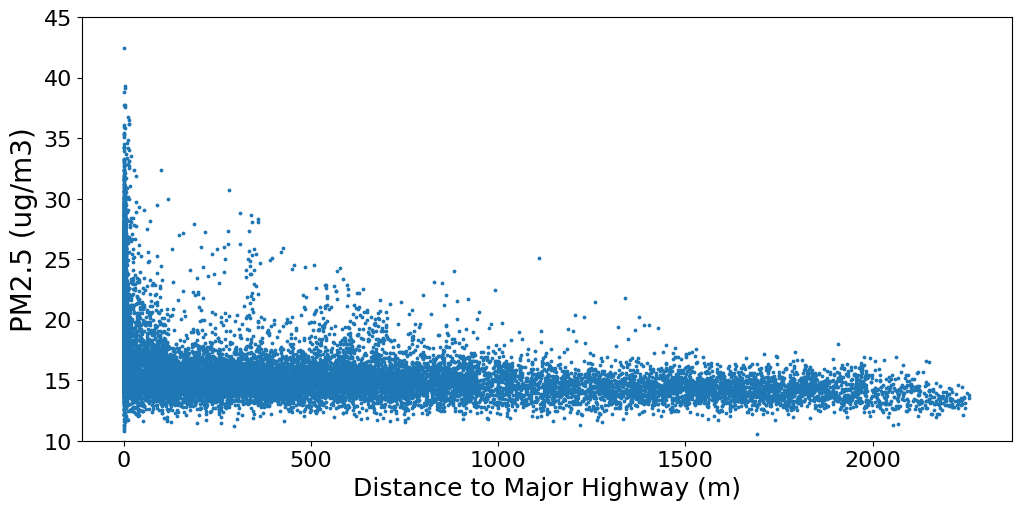

In [ ]:
# PM2p5
plt.figure(figsize=(12, 5.5))
plt.scatter(df_vis['closest_highway'], df_vis['PM2p5'], s=3)
plt.ylim(10, 45)
plt.tick_params(labelsize=16)
plt.xlabel('Distance to Major Highway (m)', fontsize=18); plt.ylabel('PM2.5 (ug/m3)', fontsize=20)
# plt.savefig('highway_distance.png', format='png', dpi=300)

# 6.Model

In [ ]:
df_model = df_vis.copy()

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')


def pred_summary(pred, ytest, limit = 200):
    """Plotting for test set predictions"""
    sns.scatterplot(x=pred, y=ytest)
    # sns.scatterplot(pred)
    # sns.scatterplot(ytest)
    abline(1, 0) #1-1 line
    plt.ylim(0, limit); plt.xlim(0, limit)
    plt.tick_params(labelsize=18)

    print('RMSE', np.sqrt(mean_squared_error(ytest, pred)))
    print('R2', r2_score(ytest, pred))



def plot_corr(df, size=10, MI = False):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    if MI == False:
        corr = df.corr()
    else:
        K = df.shape[1]
        corr = np.empty((K, K), dtype=float)

        for i, ac in enumerate(X.columns):
            for j, bc in enumerate(X.columns):
                MI = mutual_information(X.loc[:, ac], X.loc[:, bc], bins=10, normalize=True)
                corr[i, j] = MI

    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

## Feature selection

In [ ]:
df_model[numerical].columns

Index(['NO', 'NO2', 'PM2p5', 'pop_den', 'wind', 'temp', 'closest_highway',
       'closest_primary', 'closest_secondary', 'closest_tertiary',
       'trafic_signal_dist', 'stop_sign_dist', 'road_type_motorway',
       'road_type_primary', 'road_type_residential', 'road_type_secondary',
       'road_type_tertiary', 'road_type_unclassified', 'zone_commercial',
       'zone_industrial', 'zone_mixed', 'zone_open_space', 'zone_residential',
       'Longitude', 'Latitude', 'Respiratory_HI'],
      dtype='object')

In [ ]:
X = df_model[numerical].drop(['Respiratory_HI', 'Longitude','Latitude', 'road_type_unclassified','NO', 'NO2', 'PM2p5'], axis=1)

X.columns

Index(['pop_den', 'wind', 'temp', 'closest_highway', 'closest_primary',
       'closest_secondary', 'closest_tertiary', 'trafic_signal_dist',
       'stop_sign_dist', 'road_type_motorway', 'road_type_primary',
       'road_type_residential', 'road_type_secondary', 'road_type_tertiary',
       'zone_commercial', 'zone_industrial', 'zone_mixed', 'zone_open_space',
       'zone_residential'],
      dtype='object')

## Model Selection

## Train-Test Split & Feature Scaling

In [ ]:
# NO
y_NO = df_model['NO']

# NO Split the Data
X_train_NO, X_test_NO, y_train_NO, y_test_NO = model_selection.train_test_split(X, y_NO, test_size=0.25, random_state= 1)
print('training data has ' + str(X_train_NO.shape[0]) + ' observation with ' + str(X_train_NO.shape[1]) + ' features')
print('test data has ' + str(X_test_NO.shape[0]) + ' observation with ' + str(X_test_NO.shape[1]) + ' features')


# # Feature Scaling
# scaler = StandardScaler()                               # initialize the class and call it scaler
# scaler.fit(X_train_NO)                                  # fit = training data, means recalculating the data to have a mean of 0 and a std of 1 (btw, normalization typicallu means rescales the values into a range of [0,1])
# X_train_NO = scaler.transform(X_train_NO)               # apply above-calculated mean&std to standardize X_train data
# X_test_NO = scaler.transform(X_test_NO)                 # apply above-calculated min&std to X_test data (testing data could only use parameters from training data)

training data has 13662 observation with 19 features
test data has 4555 observation with 19 features


In [ ]:
# NO2
y_NO2 = df_model['NO2']


# NO2 Split the Data
X_train_NO2, X_test_NO2, y_train_NO2, y_test_NO2 = model_selection.train_test_split(X, y_NO2, test_size=0.25, random_state= 1)
print('training data has ' + str(X_train_NO2.shape[0]) + ' observation with ' + str(X_train_NO2.shape[1]) + ' features')
print('test data has ' + str(X_test_NO2.shape[0]) + ' observation with ' + str(X_test_NO2.shape[1]) + ' features')


# # Feature Scaling
# scaler = StandardScaler()
# scaler.fit(X_train_NO2)
# X_train_NO2 = scaler.transform(X_train_NO2)
# X_test_NO2 = scaler.transform(X_test_NO2)

training data has 13662 observation with 19 features
test data has 4555 observation with 19 features


In [ ]:
y_PM = df_model['PM2p5']


# NO2 Split the Data
X_train_PM, X_test_PM, y_train_PM, y_test_PM = model_selection.train_test_split(X, y_PM, test_size=0.25, random_state= 1)
print('training data has ' + str(X_train_PM.shape[0]) + ' observation with ' + str(X_train_PM.shape[1]) + ' features')
print('test data has ' + str(X_test_PM.shape[0]) + ' observation with ' + str(X_test_PM.shape[1]) + ' features')


# # Feature Scaling
# scaler = StandardScaler()
# scaler.fit(X_train_PM)
# X_train_PM = scaler.transform(X_train_PM)
# X_test_PM = scaler.transform(X_test_PM)

training data has 13662 observation with 19 features
test data has 4555 observation with 19 features


## NO2

### ensemble learning - Bagging

In [ ]:
# Use the same random forest gridsearch as above
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_jobs=2)

params = {'max_features': [6, 8, 10],
          'n_estimators': [150, 200]}

# MSE in scoring
forest_grid_no2 = GridSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error')
forest_grid_no2.fit(X_train_NO2, y_train_NO2)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=2),
             param_grid={'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best estimator and CV score
print('Best score (RMSE)', np.sqrt(np.abs(forest_grid_no2.best_score_)))
print(forest_grid_no2.best_estimator_)

Best score (RMSE) 2.27899750727032
RandomForestRegressor(max_features=10, n_estimators=200, n_jobs=2)


RMSE 2.1664170063028116
R2 0.9408697787342732


Text(0, 0.5, 'Observed NO$_2$')

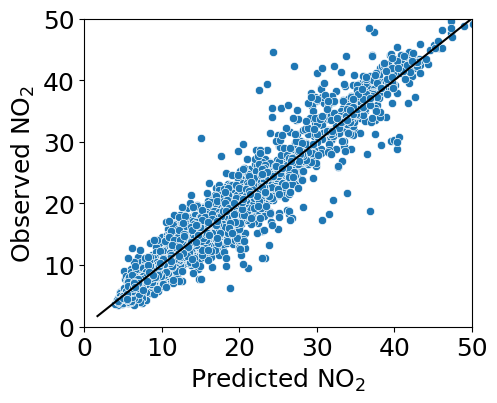

In [ ]:
fig = plt.figure(figsize=(5,4))
forest_out_no2 = forest_grid_no2.predict(X_test_NO2)
# forest_out_no2 = forest_grid_no2.predict(X_test_NO2)
pred_summary(forest_out_no2, y_test_NO2, limit=50)
plt.xlabel('Predicted NO$_2$', fontsize = 18); plt.ylabel('Observed NO$_2$', fontsize=18)

In [ ]:
FI_rf = pd.DataFrame(forest_grid_no2.best_estimator_.feature_importances_, index=X_train_NO2.columns, columns=['Feature Importance (RF)'])
FI_rf = FI_rf.sort_values(by='Feature Importance (RF)',ascending=False)
FI_rf # major factor identification

Feature Importance (RF)
closest_highway                       0.320267
road_type_motorway                    0.160701
wind                                  0.138262
temp                                  0.064951
road_type_residential                 0.063128
pop_den                               0.040315
closest_primary                       0.038970
zone_residential                      0.034974
closest_tertiary                      0.033313
closest_secondary                     0.031215
stop_sign_dist                        0.029511
trafic_signal_dist                    0.023888
zone_industrial                       0.007053
zone_commercial                       0.005400
zone_mixed                            0.003546
road_type_secondary                   0.002201
road_type_primary                     0.001174
road_type_tertiary                    0.001026
zone_open_space                       0.000106

positive or negative of factors: [SHAP value]
(https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

In [ ]:
!pip install shap
import shap

100%|===================| 4553/4555 [14:40<00:00]       

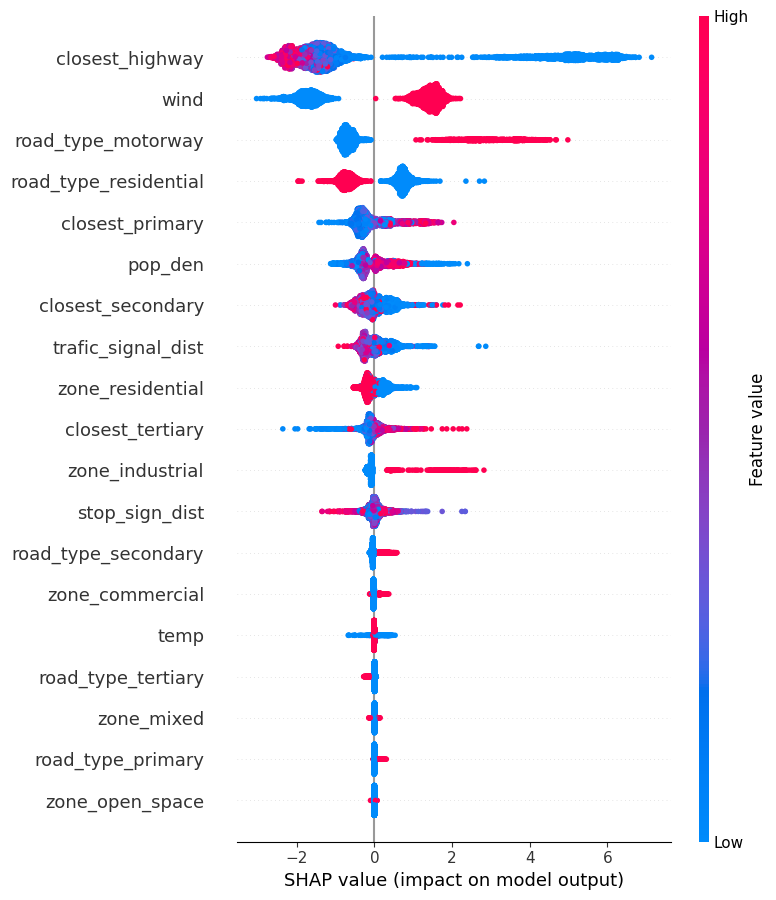

In [ ]:
# Initialize the explainer with the trained model
explainer = shap.Explainer(forest_grid_no2.best_estimator_, X_train_NO2.astype(int))

# Calculate SHAP values for a specific set of data
shap_values = explainer.shap_values(X_test_NO2.astype(int))

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_NO2.astype(int))

### ensemble learning - Boosting

In [ ]:
# Use the same random forest gridsearch as above
gb_forest = GradientBoostingRegressor()

params = {'max_features': [6, 8, 10],
          'learning_rate': [0.05, 0.1, 0.5],
          'n_estimators': [150, 200]}

gb_forest_grid_no2 = GridSearchCV(gb_forest, params, cv=5, scoring = 'neg_mean_squared_error')
gb_forest_grid_no2.fit(X_train_NO2, y_train_NO2)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best estimator and CV score
print('Best score (RMSE)', np.sqrt(np.abs(gb_forest_grid_no2.best_score_)))
print(gb_forest_grid_no2.best_estimator_)

Best score (RMSE) 2.9377972187588863
GradientBoostingRegressor(learning_rate=0.5, max_features=8, n_estimators=200)


RMSE 2.8925389429443977
R2 0.8945895126943884


Text(0, 0.5, 'Observed NO$_2$')

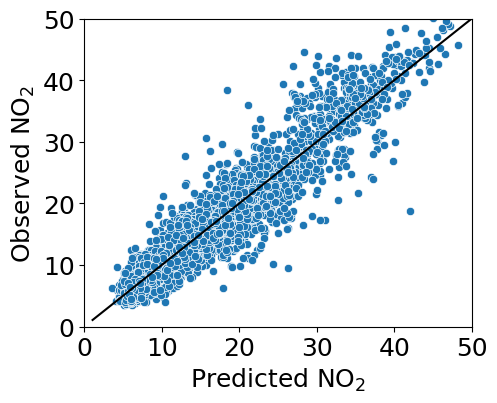

In [ ]:
fig = plt.figure(figsize=(5,4))
gb_forest_out_no2 = gb_forest_grid_no2.predict(X_test_NO2)
pred_summary(gb_forest_out_no2, y_test_NO2, limit=50)
plt.xlabel('Predicted NO$_2$', fontsize = 18); plt.ylabel('Observed NO$_2$', fontsize=18)

In [ ]:
FI_gb = pd.DataFrame(gb_forest_grid_no2.best_estimator_.feature_importances_, index=X_train_NO2.columns, columns=['Feature Importance (GB)'])
FI_gb = FI_gb.sort_values(by='Feature Importance (GB)',ascending=False)
FI_gb

Feature Importance (GB)
closest_highway                       0.336307
wind                                  0.193149
road_type_motorway                    0.139611
closest_secondary                     0.097621
zone_residential                      0.059192
pop_den                               0.041321
temp                                  0.036889
closest_tertiary                      0.023542
stop_sign_dist                        0.017339
road_type_residential                 0.016940
closest_primary                       0.016609
trafic_signal_dist                    0.010539
zone_industrial                       0.002647
zone_commercial                       0.002368
zone_mixed                            0.002131
road_type_secondary                   0.001782
road_type_primary                     0.001440
zone_open_space                       0.000343
road_type_tertiary                    0.000231

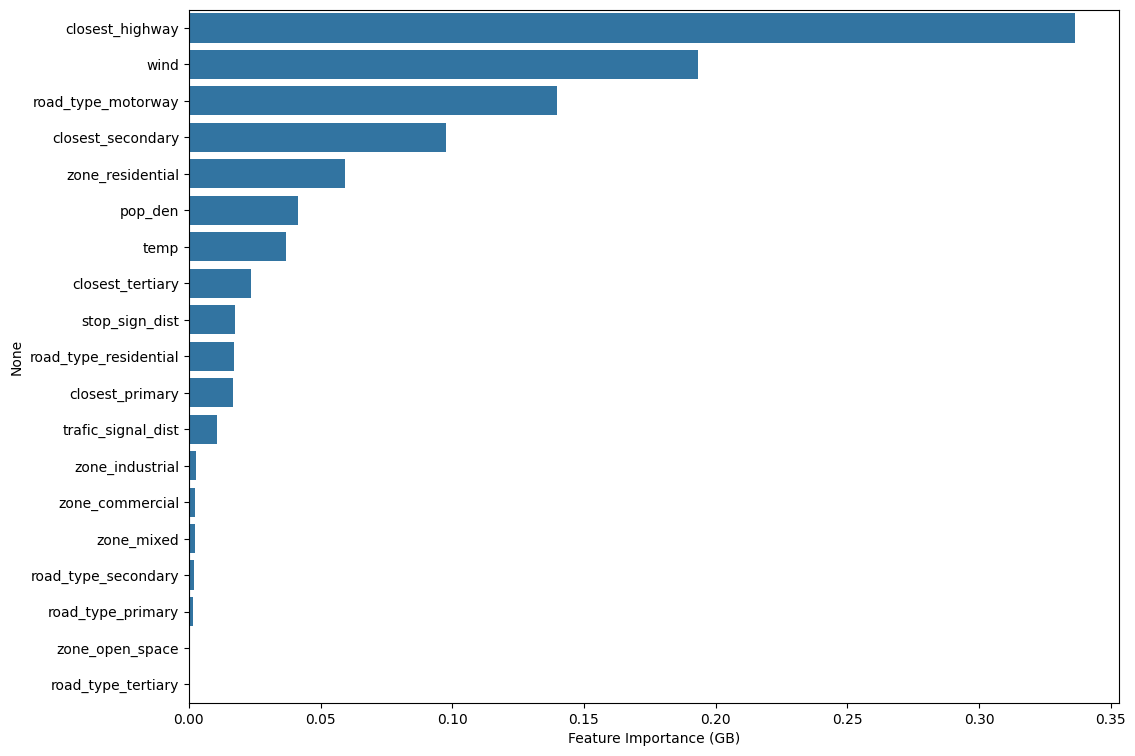

In [ ]:
g2 = sns.barplot(x="Feature Importance (GB)", y=FI_gb.index, data=FI_gb)
g2.figure.set_size_inches(12, 9)

### permutation Importance

In [ ]:
# (1) Set the best parameters from hyperparameter tuning
grid_search_best_no2 = forest_grid_no2.best_estimator_
print('Parameters currently in use:\n')
pprint(grid_search_best_no2.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 10,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 2,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# (2) Permutation Importance - Random Forest
PI_no2 = permutation_importance(grid_search_best_no2, X_test_NO2, y_test_NO2, n_repeats=5, random_state=1)

PI_res = pd.DataFrame(data=np.transpose([PI_no2['importances_mean'],PI_no2['importances_std']]),
             index = X_test_NO2.columns,columns=['PI_mean','PI_std'])
PI_res = PI_res.sort_values(by='PI_mean',ascending=False)
PI_res


PI_mean    PI_std
closest_highway        0.537822  0.004010
wind                   0.274323  0.001715
road_type_motorway     0.107275  0.001296
temp                   0.090429  0.001056
closest_primary        0.062640  0.002441
pop_den                0.041360  0.001594
closest_secondary      0.040601  0.002215
road_type_residential  0.038911  0.000547
stop_sign_dist         0.029937  0.001087
closest_tertiary       0.029928  0.000989
trafic_signal_dist     0.022722  0.002001
zone_residential       0.016458  0.000394
zone_mixed             0.004026  0.000321
zone_industrial        0.003815  0.000303
zone_commercial        0.003626  0.000336
road_type_secondary    0.001024  0.000088
road_type_tertiary     0.000415  0.000051
road_type_primary      0.000415  0.000081
zone_open_space        0.000020  0.000004

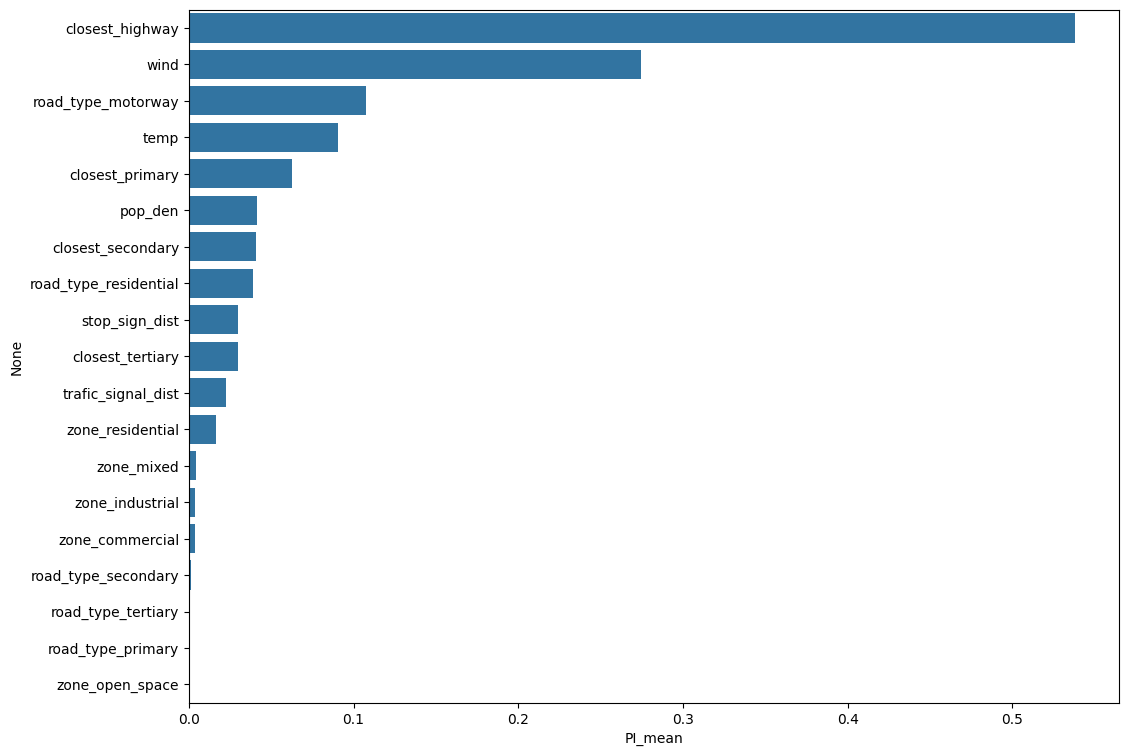

In [ ]:
g1 = sns.barplot(x="PI_mean", y=PI_res.index, data=PI_res)
g1.figure.set_size_inches(12, 9)

### result summary

In [ ]:
# Summary

summary_0 = pd.DataFrame({'Random Forest':list(FI_rf.index),
              'Gradient Boost':list(FI_gb.index),
               'Permutation Importance':list(PI_res.index)})
summary_0

Random Forest         Gradient Boost Permutation Importance
0         closest_highway        closest_highway        closest_highway
1      road_type_motorway                   wind                   wind
2                    wind     road_type_motorway     road_type_motorway
3                    temp      closest_secondary                   temp
4   road_type_residential       zone_residential        closest_primary
5                 pop_den                pop_den                pop_den
6         closest_primary                   temp      closest_secondary
7        zone_residential       closest_tertiary  road_type_residential
8        closest_tertiary         stop_sign_dist         stop_sign_dist
9       closest_secondary  road_type_residential       closest_tertiary
10         stop_sign_dist        closest_primary     trafic_signal_dist
11     trafic_signal_dist     trafic_signal_dist       zone_residential
12        zone_industrial        zone_industrial             zone_mixed
13        zone_commercial        zone_commercial        zone_industrial
14             zone_mixed             zone_mixed        zone_commercial
15    road_type_secondary    road_type_secondary    road_type_secondary
16      road_type_primary      road_type_primary     road_type_tertiary
17     road_type_tertiary        zone_open_space      road_type_primary
18        zone_open_space     road_type_tertiary        zone_open_space

## NO


### Ensemble learning - Bagging

In [ ]:
forest = RandomForestRegressor(n_jobs=2)

params = {'max_features': [6, 8, 10],
          'n_estimators': [150, 200]}

forest_grid = GridSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error')
forest_grid.fit(X_train_NO, y_train_NO)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=2),
             param_grid={'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best estimator and CV score
print('Best score (RMSE)', np.sqrt(np.abs(forest_grid.best_score_)))
print(forest_grid.best_estimator_)

Best score (RMSE) 6.433691313604495
RandomForestRegressor(max_features=8, n_estimators=200, n_jobs=2)


RMSE 5.871167614809486
R2 0.9191479136287802


Text(0, 0.5, 'Observed NO')

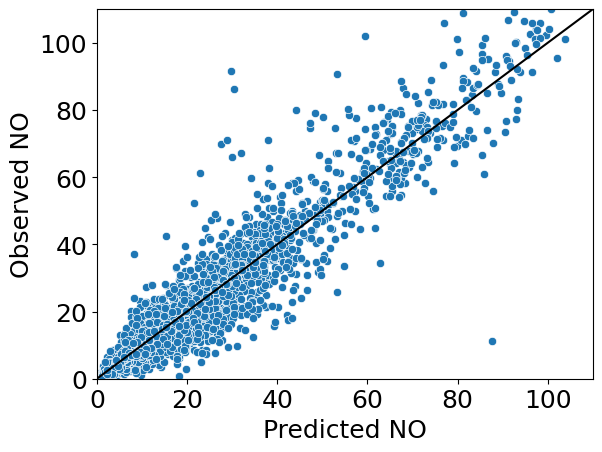

In [ ]:
forest_NO = forest_grid.predict(X_test_NO)
pred_summary(forest_NO, y_test_NO, limit=110)
plt.xlabel('Predicted NO', fontsize = 18); plt.ylabel('Observed NO', fontsize=18)

In [ ]:
FI_rf = pd.DataFrame(forest_grid.best_estimator_.feature_importances_, index=X_train_NO.columns, columns=['Feature Importance (RF)'])
FI_rf = FI_rf.sort_values(by='Feature Importance (RF)',ascending=False)
FI_rf # major factor identification

Feature Importance (RF)
road_type_motorway                    0.266633
closest_highway                       0.207465
temp                                  0.086803
wind                                  0.071545
road_type_residential                 0.061732
pop_den                               0.058127
closest_primary                       0.052304
closest_secondary                     0.043584
closest_tertiary                      0.043428
stop_sign_dist                        0.040350
trafic_signal_dist                    0.031700
zone_residential                      0.016256
zone_industrial                       0.005728
zone_mixed                            0.004939
zone_commercial                       0.003889
road_type_secondary                   0.002995
road_type_primary                     0.001380
road_type_tertiary                    0.001025
zone_open_space                       0.000117

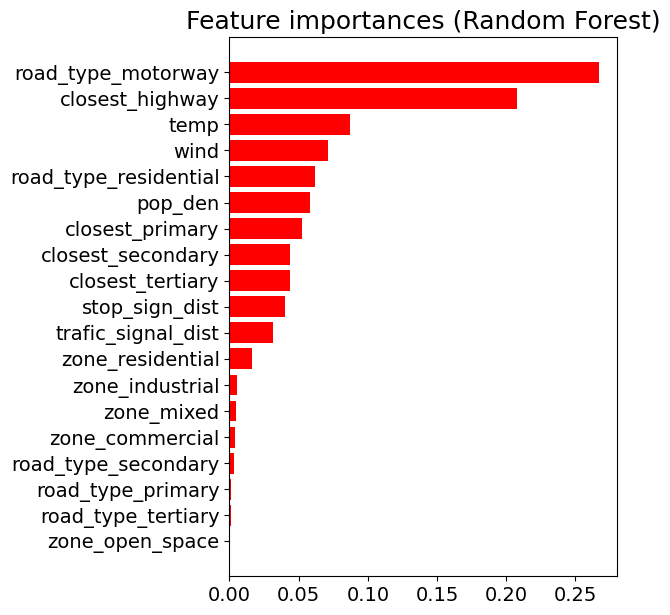

In [ ]:
features = X_train_NO.columns
importance = forest_grid.best_estimator_.feature_importances_
indices = np.argsort(importance)
plt.figure(figsize=(5, 7))
plt.title("Feature importances (Random Forest)", fontsize = 18)
plt.barh(features[indices], importance[indices],
       color="r",  align="center")
plt.tick_params(labelsize=14);

### Ensemble learning - Boosting

In [ ]:
# Use the same random forest gridsearch as above
gb_forest = GradientBoostingRegressor()

params = {'max_features': [6, 8, 10],
          'learning_rate': [0.05, 0.1, 0.5],
          'n_estimators': [150, 200]}

gb_forest_grid_no = GridSearchCV(gb_forest, params, cv=5, scoring = 'neg_mean_squared_error')
gb_forest_grid_no.fit(X_train_NO, y_train_NO)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best estimator and CV score
print('Best score (RMSE)', np.sqrt(np.abs(gb_forest_grid_no.best_score_)))
print(gb_forest_grid_no.best_estimator_)

Best score (RMSE) 8.099430317823693
GradientBoostingRegressor(learning_rate=0.5, max_features=8, n_estimators=200)


RMSE 7.6247268717577334
R2 0.8636387870995299


Text(0, 0.5, 'Observed NO')

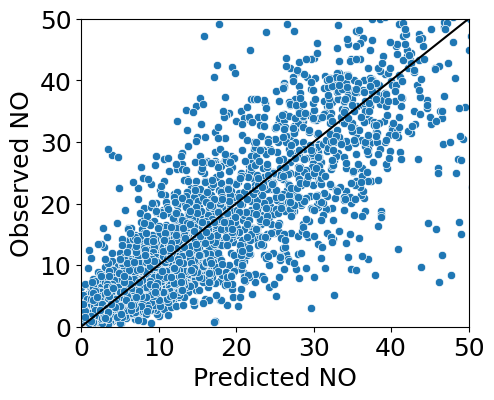

In [ ]:
fig = plt.figure(figsize=(5,4))
gb_forest_out_no = gb_forest_grid_no.predict(X_test_NO)
pred_summary(gb_forest_out_no, y_test_NO, limit=50)
plt.xlabel('Predicted NO', fontsize = 18); plt.ylabel('Observed NO', fontsize=18)

In [ ]:
FI_gb = pd.DataFrame(gb_forest_grid_no.best_estimator_.feature_importances_, index=X_train_NO.columns, columns=['Feature Importance (GB)'])
FI_gb = FI_gb.sort_values(by='Feature Importance (GB)',ascending=False)
FI_gb

Feature Importance (GB)
road_type_motorway                    0.512827
temp                                  0.126922
closest_highway                       0.058470
pop_den                               0.051428
closest_primary                       0.040860
closest_tertiary                      0.037444
wind                                  0.036485
closest_secondary                     0.032504
road_type_residential                 0.029295
zone_residential                      0.024326
stop_sign_dist                        0.018087
trafic_signal_dist                    0.012780
zone_industrial                       0.012625
zone_commercial                       0.001764
road_type_primary                     0.001308
zone_mixed                            0.001191
road_type_secondary                   0.001026
zone_open_space                       0.000552
road_type_tertiary                    0.000107

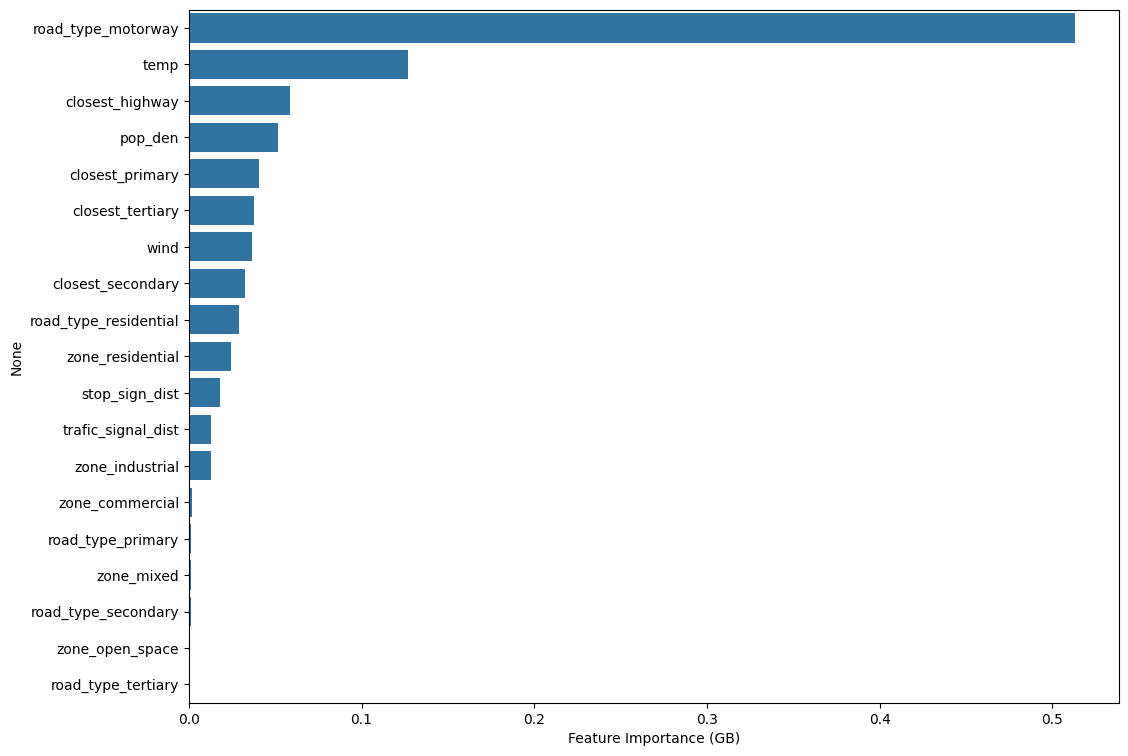

In [ ]:
g2 = sns.barplot(x="Feature Importance (GB)", y=FI_gb.index, data=FI_gb)
g2.figure.set_size_inches(12, 9)

### permutation importance

In [ ]:
grid_search_best_no = forest_grid.best_estimator_
print('Parameters currently in use:\n')
pprint(grid_search_best_no.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 8,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 2,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
PI_no = permutation_importance(grid_search_best_no, X_test_NO, y_test_NO, n_repeats=5, random_state=1)

PI_res = pd.DataFrame(data=np.transpose([PI_no['importances_mean'],PI_no['importances_std']]),
             index = X_test_NO.columns,columns=['PI_mean','PI_std'])
PI_res = PI_res.sort_values(by='PI_mean',ascending=False)
PI_res

PI_mean    PI_std
closest_highway        0.378184  0.004872
road_type_motorway     0.254756  0.003987
temp                   0.135713  0.001542
wind                   0.111034  0.002577
pop_den                0.070766  0.002028
closest_primary        0.061771  0.000873
closest_secondary      0.055171  0.004553
closest_tertiary       0.042938  0.001948
road_type_residential  0.037053  0.000495
stop_sign_dist         0.033671  0.001777
trafic_signal_dist     0.026559  0.001787
zone_residential       0.017314  0.001135
zone_mixed             0.006957  0.000991
zone_industrial        0.005060  0.000405
zone_commercial        0.001870  0.000326
road_type_secondary    0.001609  0.000165
road_type_primary      0.000838  0.000052
road_type_tertiary     0.000382  0.000050
zone_open_space        0.000043  0.000004

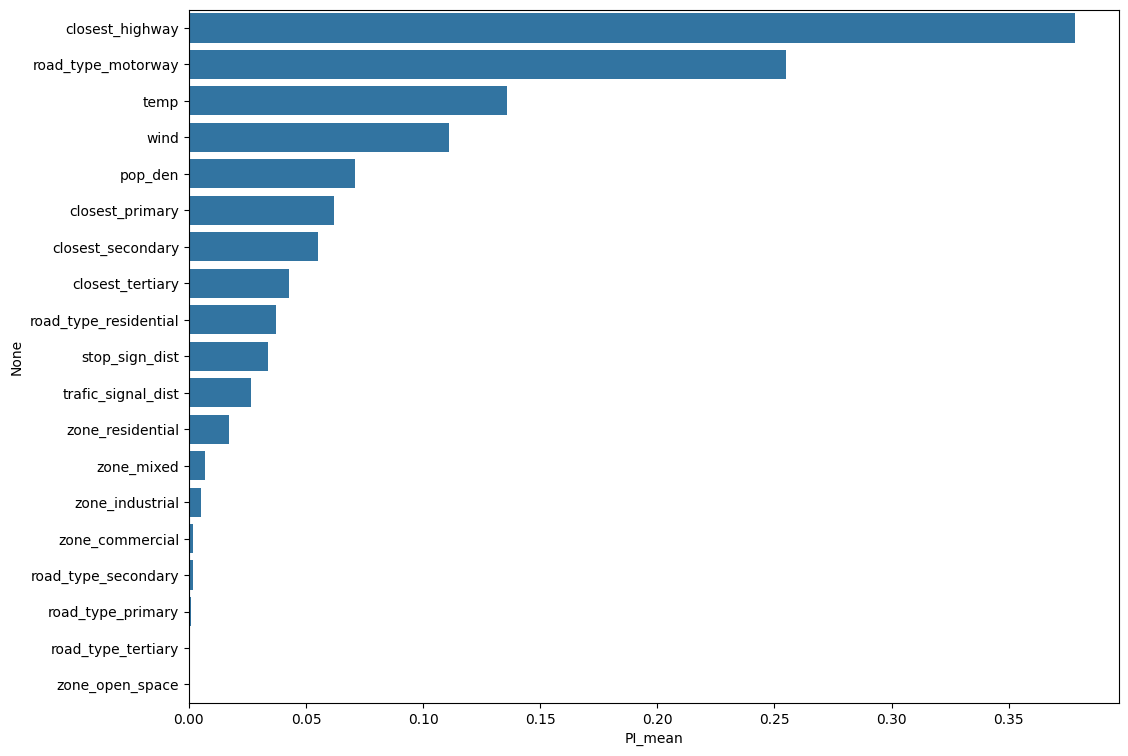

In [ ]:
g1 = sns.barplot(x="PI_mean", y=PI_res.index, data=PI_res)
g1.figure.set_size_inches(12, 9)

### result summary

In [ ]:
summary_1 = pd.DataFrame({'Random Forest':list(FI_rf.index),
              'Gradient Boost':list(FI_gb.index),
               'Permutation Importance':list(PI_res.index)})
summary_1

Random Forest         Gradient Boost Permutation Importance
0      road_type_motorway     road_type_motorway        closest_highway
1         closest_highway                   temp     road_type_motorway
2                    temp        closest_highway                   temp
3                    wind                pop_den                   wind
4   road_type_residential        closest_primary                pop_den
5                 pop_den       closest_tertiary        closest_primary
6         closest_primary                   wind      closest_secondary
7       closest_secondary      closest_secondary       closest_tertiary
8        closest_tertiary  road_type_residential  road_type_residential
9          stop_sign_dist       zone_residential         stop_sign_dist
10     trafic_signal_dist         stop_sign_dist     trafic_signal_dist
11       zone_residential     trafic_signal_dist       zone_residential
12        zone_industrial        zone_industrial             zone_mixed
13             zone_mixed        zone_commercial        zone_industrial
14        zone_commercial      road_type_primary        zone_commercial
15    road_type_secondary             zone_mixed    road_type_secondary
16      road_type_primary    road_type_secondary      road_type_primary
17     road_type_tertiary        zone_open_space     road_type_tertiary
18        zone_open_space     road_type_tertiary        zone_open_space

## PM2.5

### Ensemble learning - Bagging

In [ ]:
# Use the same random forest gridsearch as above
forest = RandomForestRegressor(n_jobs=2)

params = {'max_features': [6, 8, 10],
          'n_estimators': [150, 200, 250]}

forest_grid_pm = GridSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error')
forest_grid_pm.fit(X_train_PM, y_train_PM)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=2),
             param_grid={'max_features': [6, 8, 10],
                         'n_estimators': [150, 200, 250]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best estimator and CV score
print('Best score (RMSE)', np.sqrt(np.abs(forest_grid_pm.best_score_)))
print(forest_grid_pm.best_estimator_)

Best score (RMSE) 1.3914425909632058
RandomForestRegressor(max_features=10, n_estimators=200, n_jobs=2)


RMSE 1.3835512587013161
R2 0.8361398113291416


Text(0, 0.5, 'Observed PM')

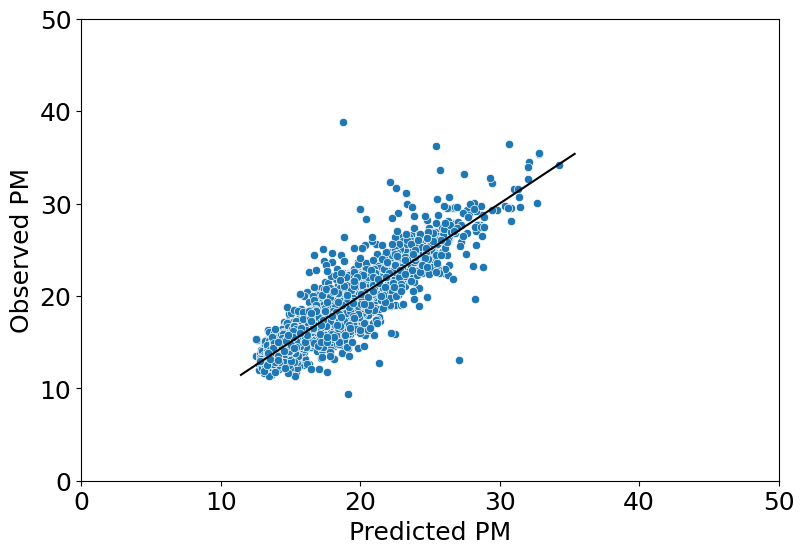

In [ ]:
fig = plt.figure(figsize=(9,6))
forest_out_pm = forest_grid_pm.predict(X_test_PM)
pred_summary(forest_out_pm, y_test_PM, limit=50)
plt.xlabel('Predicted PM', fontsize = 18); plt.ylabel('Observed PM', fontsize=18)

In [ ]:
FI_rf = pd.DataFrame(forest_grid_pm.best_estimator_.feature_importances_, index=X_train_PM.columns, columns=['Feature Importance (RF)'])
FI_rf = FI_rf.sort_values(by='Feature Importance (RF)',ascending=False)
FI_rf # major factor identification

Feature Importance (RF)
road_type_motorway                    0.239946
closest_highway                       0.218638
wind                                  0.099237
closest_primary                       0.061840
temp                                  0.060405
closest_tertiary                      0.052749
pop_den                               0.050698
closest_secondary                     0.047931
stop_sign_dist                        0.046524
road_type_residential                 0.044564
trafic_signal_dist                    0.035991
zone_residential                      0.019533
zone_industrial                       0.006738
zone_mixed                            0.005317
zone_commercial                       0.004888
road_type_secondary                   0.003266
road_type_tertiary                    0.000912
road_type_primary                     0.000533
zone_open_space                       0.000294

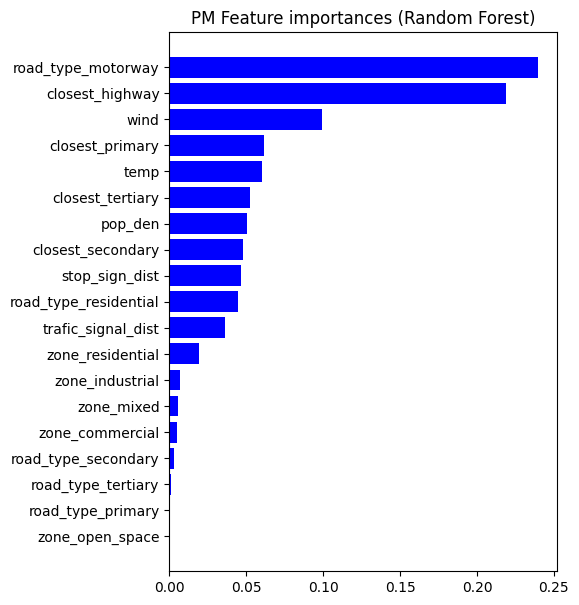

In [ ]:
features = X.columns
importance = forest_grid_pm.best_estimator_.feature_importances_
indices = np.argsort(importance)
plt.figure(figsize=(5, 7))
plt.title("PM Feature importances (Random Forest)")
plt.barh(features[indices], importance[indices],
       color="b",  align="center");

### Ensemble learning - Boosting

In [ ]:
# Use the same random forest gridsearch as above
gb_forest = GradientBoostingRegressor()

params = {'max_features': [6, 8, 10],
          'learning_rate': [0.05, 0.1, 0.5],
          'n_estimators': [150, 200]}

gb_forest_grid_pm = GridSearchCV(gb_forest, params, cv=5, scoring = 'neg_mean_squared_error')
gb_forest_grid_pm.fit(X_train_PM, y_train_PM)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best estimator and CV score
print('Best score (RMSE)', np.sqrt(np.abs(gb_forest_grid_pm.best_score_)))
print(gb_forest_grid_pm.best_estimator_)

Best score (RMSE) 1.572134464565409
GradientBoostingRegressor(learning_rate=0.5, max_features=10, n_estimators=200)


RMSE 1.5583790698527826
R2 0.7921121267300372


Text(0, 0.5, 'Observed PM2.5')

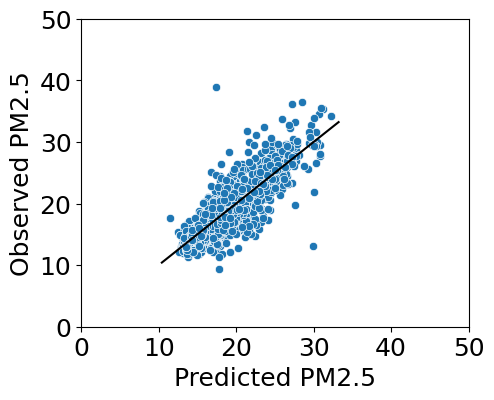

In [ ]:
fig = plt.figure(figsize=(5,4))
gb_forest_out_pm = gb_forest_grid_pm.predict(X_test_PM)
pred_summary(gb_forest_out_pm, y_test_PM, limit=50)
plt.xlabel('Predicted PM2.5', fontsize = 18); plt.ylabel('Observed PM2.5', fontsize=18)

In [ ]:
FI_gb = pd.DataFrame(gb_forest_grid_pm.best_estimator_.feature_importances_, index=X_train_PM.columns, columns=['Feature Importance (GB)'])
FI_gb = FI_gb.sort_values(by='Feature Importance (GB)',ascending=False)
FI_gb

Feature Importance (GB)
closest_highway                       0.537270
temp                                  0.113440
wind                                  0.057391
pop_den                               0.056422
zone_residential                      0.046343
stop_sign_dist                        0.040202
closest_primary                       0.033305
closest_tertiary                      0.032076
closest_secondary                     0.031527
road_type_motorway                    0.019453
trafic_signal_dist                    0.013568
road_type_residential                 0.009260
zone_mixed                            0.006175
zone_commercial                       0.001652
road_type_primary                     0.000703
zone_industrial                       0.000543
road_type_secondary                   0.000380
zone_open_space                       0.000147
road_type_tertiary                    0.000143

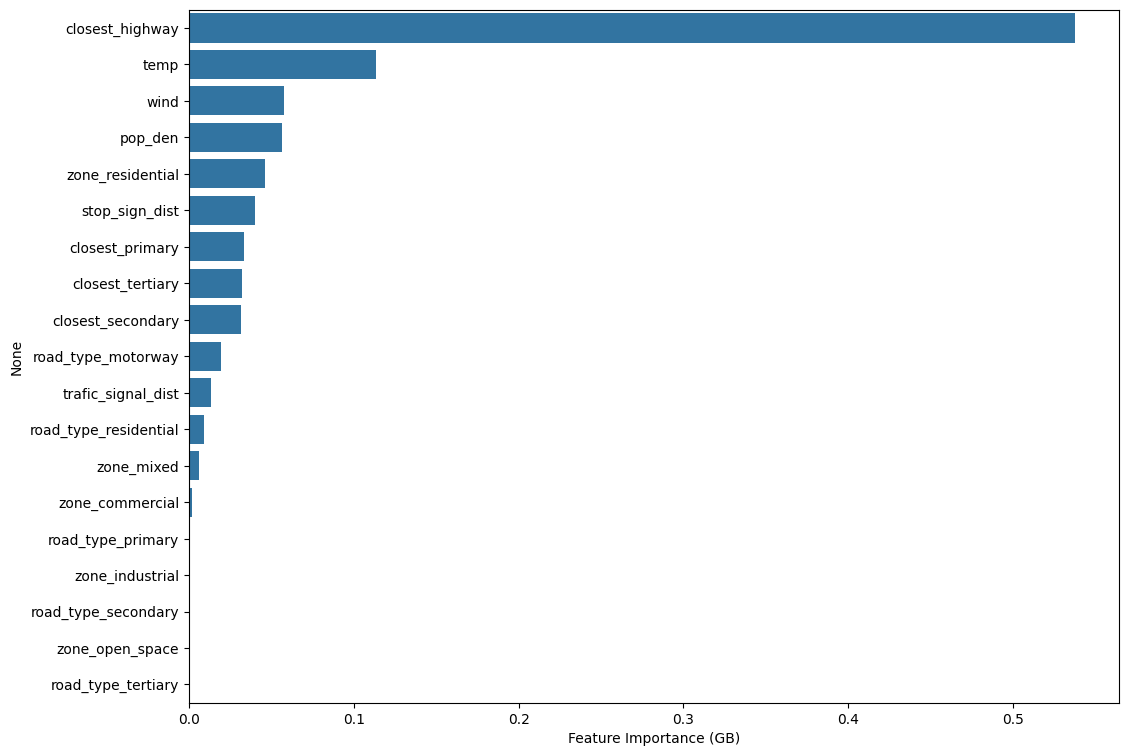

In [ ]:
g2 = sns.barplot(x="Feature Importance (GB)", y=FI_gb.index, data=FI_gb)
g2.figure.set_size_inches(12, 9)

### permutation importance

In [ ]:
grid_search_best_pm = forest_grid_pm.best_estimator_
print('Parameters currently in use:\n')
pprint(grid_search_best_pm.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 10,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 2,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
PI_no = permutation_importance(grid_search_best_pm, X_test_PM, y_test_PM, n_repeats=5, random_state=1)

PI_res = pd.DataFrame(data=np.transpose([PI_no['importances_mean'],PI_no['importances_std']]),
             index = X_test_PM.columns,columns=['PI_mean','PI_std'])
PI_res = PI_res.sort_values(by='PI_mean',ascending=False)
PI_res

PI_mean    PI_std
closest_highway        0.342780  0.006512
road_type_motorway     0.233784  0.006138
wind                   0.208133  0.005919
closest_primary        0.074888  0.003984
temp                   0.071574  0.003545
pop_den                0.049688  0.002740
closest_tertiary       0.036306  0.003105
stop_sign_dist         0.032186  0.001247
closest_secondary      0.031642  0.002773
road_type_residential  0.025957  0.000829
trafic_signal_dist     0.019280  0.001438
zone_residential       0.012827  0.001888
zone_mixed             0.005899  0.000529
zone_industrial        0.002258  0.000467
zone_commercial        0.002000  0.000494
road_type_primary      0.000299  0.000043
road_type_secondary    0.000130  0.000069
road_type_tertiary    -0.000039  0.000054
zone_open_space       -0.000207  0.000018

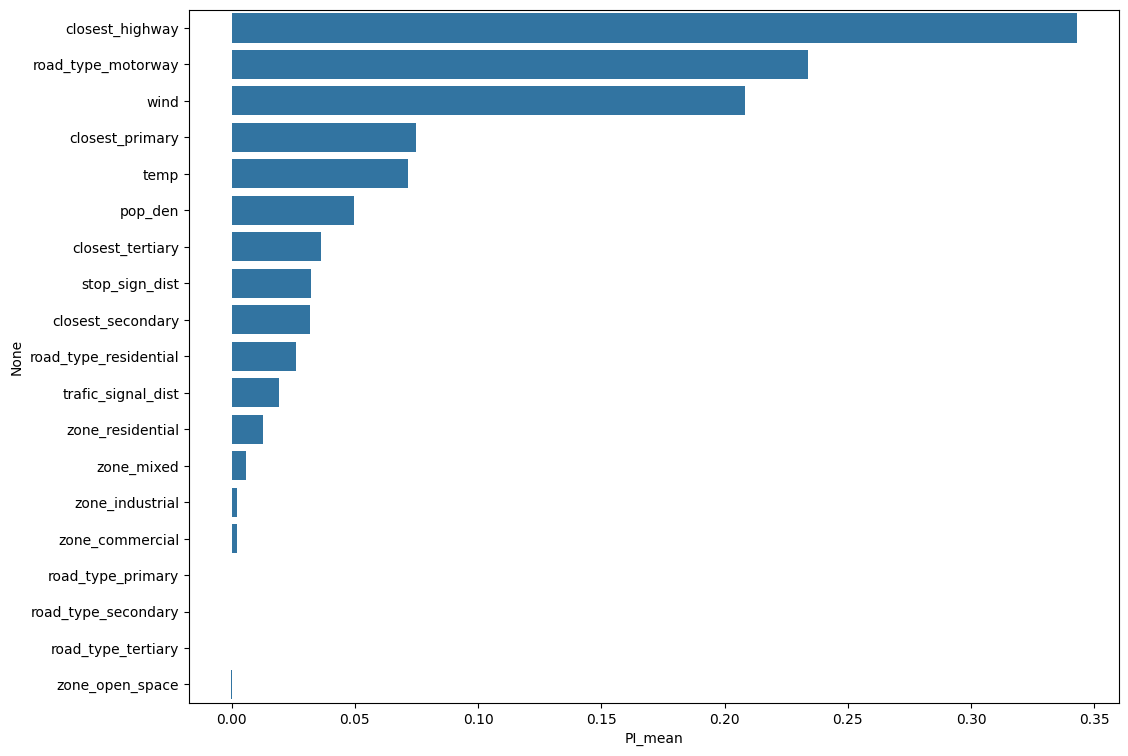

In [ ]:
g1 = sns.barplot(x="PI_mean", y=PI_res.index, data=PI_res)
g1.figure.set_size_inches(12, 9)

### result summary

In [ ]:
summary_2 = pd.DataFrame({'Random Forest':list(FI_rf.index),
              'Gradient Boost':list(FI_gb.index),
               'Permutation Importance':list(PI_res.index)})
summary_2

Random Forest         Gradient Boost Permutation Importance
0      road_type_motorway        closest_highway        closest_highway
1         closest_highway                   temp     road_type_motorway
2                    wind                   wind                   wind
3         closest_primary                pop_den        closest_primary
4                    temp       zone_residential                   temp
5        closest_tertiary         stop_sign_dist                pop_den
6                 pop_den        closest_primary       closest_tertiary
7       closest_secondary       closest_tertiary         stop_sign_dist
8          stop_sign_dist      closest_secondary      closest_secondary
9   road_type_residential     road_type_motorway  road_type_residential
10     trafic_signal_dist     trafic_signal_dist     trafic_signal_dist
11       zone_residential  road_type_residential       zone_residential
12        zone_industrial             zone_mixed             zone_mixed
13             zone_mixed        zone_commercial        zone_industrial
14        zone_commercial      road_type_primary        zone_commercial
15    road_type_secondary        zone_industrial      road_type_primary
16     road_type_tertiary    road_type_secondary    road_type_secondary
17      road_type_primary        zone_open_space     road_type_tertiary
18        zone_open_space     road_type_tertiary        zone_open_space